# Applied Machine Learning - Group 41 - Assignment 2
## Iris flower dataset classification using Neural network
- ABHIRAJ ANAND - 2020MT12283
- BANESH K SHENVI - 2020mt12373
- MADHUMITHA M - 2020mt12048
- SHETTY VISHAKA VISHWANATHA SHUBHA - 2020mt120342020mt12034

# Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### a. Input data = Iris dataset

In [2]:
#Importing the dataset, df stands for dataframe
iris_df = pd.read_csv('Iris.csv')

In [3]:
#get dummies is used to converts categorical data into dummy or indicator variables.
iris_df = pd.get_dummies(iris_df, columns=['Species'])
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                    1                        0                       0  
1                    1                        0                       0  
2                    1                        0                       0  
3                    1                        0                       0  
4                    1                        0                       0

One-hot labels by get_dummies() method

In [4]:
#X are the inputs and y are the labels/output
X = iris_df.values[:, 1:5]
y = iris_df.values[:, 5:8]

In [5]:
#Normalize input data to get on a same scale between 0 and 1
def normalize(array):
    arr_min = array.min(axis=(0, 1))
    arr_max = array.max(axis=(0, 1))
    return (array - arr_min) / (arr_max - arr_min)

In [6]:
X = normalize(X)

In [7]:
#Split dataset into train and test set, test is equal to 10% of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
#pip install keras

# Build NN with Keras

In [9]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD #Stochastic gradient descent

### b. Number of hidden layers = 1
### c.  Number of units in hidden layer = 10
### e. Learning algorithm = stochastic gradient descent
### f. Activation = logistic/sigmoid

In [10]:
#Defining the model  LR 0.0001
def create_network_LR1():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using sigmoid
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 10 values using sigmoid
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
          
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer SGD.
    return model

In [11]:
model_LR1 = create_network_LR1()  # LR 0.0001

### d. Number of iterations = 5000

In [12]:
#Training the model, by providing input values, output labels, number of epochs, batch size define how much data should be picked up in one iteration, and defining the test data as the validation data
import time

Elapsed_time = []
X_test = np.asarray(X_test).astype('float32')

Start_time = time.time()
results_LR1 = model_LR1.fit(X_train,y_train, epochs=5000, batch_size=8,verbose=1, validation_data=(X_test, y_test))  # LR 0.0001
End_time = time.time()

Elapsed_time.append(End_time-Start_time)


Epoch 1/5000
17/17 [==============================] - 2s 83ms/step - loss: 1.0968 - accuracy: 0.3944 - val_loss: 1.1323 - val_accuracy: 0.4000
Epoch 2/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1062 - accuracy: 0.3487 - val_loss: 1.1322 - val_accuracy: 0.4000
Epoch 3/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.3086 - val_loss: 1.1321 - val_accuracy: 0.4000
Epoch 4/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1316 - accuracy: 0.3189 - val_loss: 1.1320 - val_accuracy: 0.4000
Epoch 5/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1159 - accuracy: 0.3091 - val_loss: 1.1320 - val_accuracy: 0.4000
Epoch 6/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1064 - accuracy: 0.3898 - val_loss: 1.1319 - val_accuracy: 0.4000
Epoch 7/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3215 - val_loss: 1.1318 - val_accuracy: 0.4000
Epoch

17/17 [==============================] - 0s 3ms/step - loss: 1.1114 - accuracy: 0.3082 - val_loss: 1.1248 - val_accuracy: 0.4000
Epoch 116/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3264 - val_loss: 1.1248 - val_accuracy: 0.4000
Epoch 117/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.3170 - val_loss: 1.1247 - val_accuracy: 0.4000
Epoch 118/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1147 - accuracy: 0.3258 - val_loss: 1.1246 - val_accuracy: 0.4000
Epoch 119/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1116 - accuracy: 0.3421 - val_loss: 1.1246 - val_accuracy: 0.4000
Epoch 120/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1088 - accuracy: 0.2847 - val_loss: 1.1245 - val_accuracy: 0.4000
Epoch 121/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1112 - accuracy: 0.2891 - val_loss: 1.1245 - val_accuracy: 0.4000
Epoch 1

Epoch 172/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1089 - accuracy: 0.3302 - val_loss: 1.1221 - val_accuracy: 0.4000
Epoch 173/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1084 - accuracy: 0.2909 - val_loss: 1.1220 - val_accuracy: 0.4000
Epoch 174/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1159 - accuracy: 0.2819 - val_loss: 1.1220 - val_accuracy: 0.4000
Epoch 175/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1068 - accuracy: 0.3039 - val_loss: 1.1219 - val_accuracy: 0.4000
Epoch 176/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1071 - accuracy: 0.2999 - val_loss: 1.1219 - val_accuracy: 0.4000
Epoch 177/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1180 - accuracy: 0.2875 - val_loss: 1.1218 - val_accuracy: 0.4000
Epoch 178/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1169 - accuracy: 0.3168 - val_loss: 1.1218 - val_accuracy:

Epoch 229/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1139 - accuracy: 0.3416 - val_loss: 1.1198 - val_accuracy: 0.4000
Epoch 230/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1234 - accuracy: 0.2897 - val_loss: 1.1198 - val_accuracy: 0.4000
Epoch 231/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3119 - val_loss: 1.1197 - val_accuracy: 0.4000
Epoch 232/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1036 - accuracy: 0.3519 - val_loss: 1.1197 - val_accuracy: 0.4000
Epoch 233/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1088 - accuracy: 0.3035 - val_loss: 1.1197 - val_accuracy: 0.4000
Epoch 234/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.3428 - val_loss: 1.1196 - val_accuracy: 0.4000
Epoch 235/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1096 - accuracy: 0.3185 - val_loss: 1.1196 - val_accuracy:

Epoch 286/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1017 - accuracy: 0.3905 - val_loss: 1.1179 - val_accuracy: 0.4000
Epoch 287/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1091 - accuracy: 0.3235 - val_loss: 1.1179 - val_accuracy: 0.4000
Epoch 288/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1020 - accuracy: 0.3479 - val_loss: 1.1179 - val_accuracy: 0.4000
Epoch 289/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3193 - val_loss: 1.1179 - val_accuracy: 0.4000
Epoch 290/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1082 - accuracy: 0.3509 - val_loss: 1.1178 - val_accuracy: 0.4000
Epoch 291/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1209 - accuracy: 0.3063 - val_loss: 1.1178 - val_accuracy: 0.4000
Epoch 292/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1035 - accuracy: 0.3447 - val_loss: 1.1178 - val_accuracy:

Epoch 343/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.5016 - val_loss: 1.1164 - val_accuracy: 0.4000
Epoch 344/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.4976 - val_loss: 1.1164 - val_accuracy: 0.4000
Epoch 345/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1140 - accuracy: 0.4547 - val_loss: 1.1164 - val_accuracy: 0.4000
Epoch 346/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1042 - accuracy: 0.4999 - val_loss: 1.1164 - val_accuracy: 0.4000
Epoch 347/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.4885 - val_loss: 1.1163 - val_accuracy: 0.4000
Epoch 348/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1022 - accuracy: 0.4590 - val_loss: 1.1163 - val_accuracy: 0.4000
Epoch 349/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1028 - accuracy: 0.4919 - val_loss: 1.1163 - val_accuracy:

Epoch 400/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3575 - val_loss: 1.1152 - val_accuracy: 0.2000
Epoch 401/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0936 - accuracy: 0.3164 - val_loss: 1.1151 - val_accuracy: 0.2000
Epoch 402/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3809 - val_loss: 1.1151 - val_accuracy: 0.2000
Epoch 403/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3161 - val_loss: 1.1151 - val_accuracy: 0.2000
Epoch 404/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3549 - val_loss: 1.1151 - val_accuracy: 0.2000
Epoch 405/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1079 - accuracy: 0.3313 - val_loss: 1.1151 - val_accuracy: 0.2000
Epoch 406/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3142 - val_loss: 1.1150 - val_accuracy:

Epoch 457/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.4303 - val_loss: 1.1141 - val_accuracy: 0.2000
Epoch 458/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1009 - accuracy: 0.3654 - val_loss: 1.1141 - val_accuracy: 0.2000
Epoch 459/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1072 - accuracy: 0.3111 - val_loss: 1.1141 - val_accuracy: 0.2000
Epoch 460/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1021 - accuracy: 0.3465 - val_loss: 1.1141 - val_accuracy: 0.2000
Epoch 461/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1058 - accuracy: 0.2752 - val_loss: 1.1141 - val_accuracy: 0.2000
Epoch 462/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1054 - accuracy: 0.2608 - val_loss: 1.1140 - val_accuracy: 0.2000
Epoch 463/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.3277 - val_loss: 1.1140 - val_accuracy:

Epoch 514/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3524 - val_loss: 1.1133 - val_accuracy: 0.2000
Epoch 515/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3419 - val_loss: 1.1132 - val_accuracy: 0.2000
Epoch 516/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3615 - val_loss: 1.1132 - val_accuracy: 0.2000
Epoch 517/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1028 - accuracy: 0.2905 - val_loss: 1.1132 - val_accuracy: 0.2000
Epoch 518/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3163 - val_loss: 1.1132 - val_accuracy: 0.2000
Epoch 519/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3520 - val_loss: 1.1132 - val_accuracy: 0.2000
Epoch 520/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1057 - accuracy: 0.3014 - val_loss: 1.1132 - val_accuracy:

Epoch 571/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.2881 - val_loss: 1.1125 - val_accuracy: 0.2000
Epoch 572/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.3597 - val_loss: 1.1125 - val_accuracy: 0.2000
Epoch 573/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3790 - val_loss: 1.1125 - val_accuracy: 0.2000
Epoch 574/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1008 - accuracy: 0.3704 - val_loss: 1.1125 - val_accuracy: 0.2000
Epoch 575/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.3684 - val_loss: 1.1125 - val_accuracy: 0.2000
Epoch 576/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3694 - val_loss: 1.1125 - val_accuracy: 0.2000
Epoch 577/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1028 - accuracy: 0.3280 - val_loss: 1.1125 - val_accuracy:

Epoch 628/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3587 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 629/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0933 - accuracy: 0.3964 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 630/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3096 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 631/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3448 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 632/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.3697 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 633/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3372 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 634/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3813 - val_loss: 1.1119 - val_accuracy:

Epoch 685/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3484 - val_loss: 1.1114 - val_accuracy: 0.2000
Epoch 686/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1072 - accuracy: 0.3314 - val_loss: 1.1114 - val_accuracy: 0.2000
Epoch 687/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3427 - val_loss: 1.1114 - val_accuracy: 0.2000
Epoch 688/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0918 - accuracy: 0.3328 - val_loss: 1.1114 - val_accuracy: 0.2000
Epoch 689/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3317 - val_loss: 1.1113 - val_accuracy: 0.2000
Epoch 690/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3707 - val_loss: 1.1113 - val_accuracy: 0.2000
Epoch 691/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.3553 - val_loss: 1.1113 - val_accuracy:

Epoch 742/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3614 - val_loss: 1.1109 - val_accuracy: 0.2000
Epoch 743/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1023 - accuracy: 0.3447 - val_loss: 1.1109 - val_accuracy: 0.2000
Epoch 744/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3502 - val_loss: 1.1109 - val_accuracy: 0.2000
Epoch 745/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1024 - accuracy: 0.3172 - val_loss: 1.1109 - val_accuracy: 0.2000
Epoch 746/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0938 - accuracy: 0.3893 - val_loss: 1.1109 - val_accuracy: 0.2000
Epoch 747/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.3707 - val_loss: 1.1109 - val_accuracy: 0.2000
Epoch 748/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3375 - val_loss: 1.1109 - val_accuracy:

Epoch 799/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0899 - accuracy: 0.4122 - val_loss: 1.1106 - val_accuracy: 0.2000
Epoch 800/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.4001 - val_loss: 1.1106 - val_accuracy: 0.2000
Epoch 801/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.3542 - val_loss: 1.1105 - val_accuracy: 0.2000
Epoch 802/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3942 - val_loss: 1.1105 - val_accuracy: 0.2000
Epoch 803/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3140 - val_loss: 1.1105 - val_accuracy: 0.2000
Epoch 804/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0934 - accuracy: 0.3831 - val_loss: 1.1105 - val_accuracy: 0.2000
Epoch 805/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.3234 - val_loss: 1.1105 - val_accuracy:

Epoch 856/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1026 - accuracy: 0.3059 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 857/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3444 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 858/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0928 - accuracy: 0.3969 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 859/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3293 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 860/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.3347 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 861/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3369 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 862/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3217 - val_loss: 1.1102 - val_accuracy:

Epoch 913/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1044 - accuracy: 0.2914 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 914/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3428 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 915/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1037 - accuracy: 0.2903 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 916/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3093 - val_loss: 1.1099 - val_accuracy: 0.2000
Epoch 917/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3458 - val_loss: 1.1099 - val_accuracy: 0.2000
Epoch 918/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.3863 - val_loss: 1.1099 - val_accuracy: 0.2000
Epoch 919/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3652 - val_loss: 1.1099 - val_accuracy:

Epoch 970/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0998 - accuracy: 0.3451 - val_loss: 1.1097 - val_accuracy: 0.2000
Epoch 971/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.3446 - val_loss: 1.1097 - val_accuracy: 0.2000
Epoch 972/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0997 - accuracy: 0.3299 - val_loss: 1.1097 - val_accuracy: 0.2000
Epoch 973/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.3390 - val_loss: 1.1097 - val_accuracy: 0.2000
Epoch 974/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.3404 - val_loss: 1.1097 - val_accuracy: 0.2000
Epoch 975/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0917 - accuracy: 0.4087 - val_loss: 1.1097 - val_accuracy: 0.2000
Epoch 976/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.4370 - val_loss: 1.1097 - val_accuracy:

Epoch 1027/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3404 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 1028/5000
17/17 [==============================] - 0s 5ms/step - loss: 1.0963 - accuracy: 0.3553 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 1029/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.3754 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 1030/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1008 - accuracy: 0.3428 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 1031/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0943 - accuracy: 0.4075 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 1032/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0931 - accuracy: 0.4146 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 1033/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3687 - val_loss: 1.1095 - val_ac

17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3467 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 1140/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0912 - accuracy: 0.4086 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 1141/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3376 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 1142/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1006 - accuracy: 0.3021 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 1143/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3288 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 1144/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0954 - accuracy: 0.3724 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 1145/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.2961 - val_loss: 1.1092 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3426 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1252/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3907 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1253/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3709 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1254/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3501 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1255/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3558 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1256/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3692 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1257/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3611 - val_loss: 1.1089 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1026 - accuracy: 0.2894 - val_loss: 1.1087 - val_accuracy: 0.2000
Epoch 1364/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.2950 - val_loss: 1.1087 - val_accuracy: 0.2000
Epoch 1365/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.3562 - val_loss: 1.1087 - val_accuracy: 0.2000
Epoch 1366/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3477 - val_loss: 1.1087 - val_accuracy: 0.2000
Epoch 1367/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3396 - val_loss: 1.1087 - val_accuracy: 0.2000
Epoch 1368/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3416 - val_loss: 1.1087 - val_accuracy: 0.2000
Epoch 1369/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.3241 - val_loss: 1.1087 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.3115 - val_loss: 1.1086 - val_accuracy: 0.2000
Epoch 1476/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.3410 - val_loss: 1.1086 - val_accuracy: 0.2000
Epoch 1477/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3298 - val_loss: 1.1086 - val_accuracy: 0.2000
Epoch 1478/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.3742 - val_loss: 1.1086 - val_accuracy: 0.2000
Epoch 1479/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3225 - val_loss: 1.1086 - val_accuracy: 0.2000
Epoch 1480/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1050 - accuracy: 0.2432 - val_loss: 1.1086 - val_accuracy: 0.2000
Epoch 1481/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3791 - val_loss: 1.1086 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0984 - accuracy: 0.3233 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1588/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3089 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1589/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3821 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1590/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3851 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1591/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3460 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1592/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.3619 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1593/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3174 - val_loss: 1.1085 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0928 - accuracy: 0.4146 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1700/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3822 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1701/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3647 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1702/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3576 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1703/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.3577 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1704/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3514 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1705/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.2860 - val_loss: 1.1084 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.3771 - val_loss: 1.1083 - val_accuracy: 0.2000
Epoch 1812/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3174 - val_loss: 1.1083 - val_accuracy: 0.2000
Epoch 1813/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3298 - val_loss: 1.1083 - val_accuracy: 0.2000
Epoch 1814/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3693 - val_loss: 1.1083 - val_accuracy: 0.2000
Epoch 1815/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1031 - accuracy: 0.2714 - val_loss: 1.1083 - val_accuracy: 0.2000
Epoch 1816/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.4215 - val_loss: 1.1083 - val_accuracy: 0.2000
Epoch 1817/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3799 - val_loss: 1.1083 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3618 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 1924/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.3950 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 1925/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.3552 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 1926/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3410 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 1927/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3711 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 1928/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.3532 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 1929/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3287 - val_loss: 1.1082 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3442 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 2036/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0928 - accuracy: 0.4099 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 2037/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.3343 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 2038/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.2939 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 2039/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3652 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 2040/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3279 - val_loss: 1.1082 - val_accuracy: 0.2000
Epoch 2041/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3427 - val_loss: 1.1082 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3531 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 2148/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1015 - accuracy: 0.2908 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 2149/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3664 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 2150/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3463 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 2151/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3627 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 2152/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3454 - val_loss: 1.1081 - val_accuracy: 0.2000
Epoch 2153/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3484 - val_loss: 1.1081 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3412 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2260/5000
17/17 [==============================] - 0s 5ms/step - loss: 1.1006 - accuracy: 0.3042 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2261/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0953 - accuracy: 0.3762 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2262/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1000 - accuracy: 0.3093 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2263/5000
17/17 [==============================] - 0s 5ms/step - loss: 1.0988 - accuracy: 0.3299 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2264/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0963 - accuracy: 0.3620 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2265/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0949 - accuracy: 0.3799 - val_loss: 1.1080 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.3301 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2372/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3758 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2373/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.3835 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2374/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3718 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2375/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0925 - accuracy: 0.4083 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2376/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3821 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 2377/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1016 - accuracy: 0.2836 - val_loss: 1.1080 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3235 - val_loss: 1.1079 - val_accuracy: 0.2000
Epoch 2484/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3549 - val_loss: 1.1079 - val_accuracy: 0.2000
Epoch 2485/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3491 - val_loss: 1.1079 - val_accuracy: 0.2000
Epoch 2486/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0913 - accuracy: 0.4293 - val_loss: 1.1079 - val_accuracy: 0.2000
Epoch 2487/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3140 - val_loss: 1.1079 - val_accuracy: 0.2000
Epoch 2488/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3276 - val_loss: 1.1079 - val_accuracy: 0.2000
Epoch 2489/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3675 - val_loss: 1.1079 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0901 - accuracy: 0.4475 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2596/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3503 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2597/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3504 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2598/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.3419 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2599/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3692 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2600/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3481 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2601/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.3799 - val_loss: 1.1078 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1009 - accuracy: 0.2965 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2708/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.2863 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2709/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0931 - accuracy: 0.4027 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2710/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3035 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2711/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3422 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2712/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.3127 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 2713/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3285 - val_loss: 1.1078 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3915 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2820/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3790 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2821/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0954 - accuracy: 0.3718 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2822/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3045 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2823/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3153 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2824/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3396 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2825/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.3508 - val_loss: 1.1077 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3134 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2932/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3501 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2933/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3561 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2934/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0997 - accuracy: 0.3120 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2935/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3816 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2936/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3595 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 2937/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3578 - val_loss: 1.1077 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3581 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3044/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.3051 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3045/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.3062 - val_loss: 1.1077 - val_accuracy: 0.2000
Epoch 3046/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.2930 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3047/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3421 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3048/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1006 - accuracy: 0.2970 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3049/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3298 - val_loss: 1.1076 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3666 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3156/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3565 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3157/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.3686 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3158/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3762 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3159/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3485 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3160/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3243 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3161/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3236 - val_loss: 1.1076 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.3931 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3268/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3374 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3269/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3439 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3270/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.3452 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3271/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3191 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3272/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0933 - accuracy: 0.3975 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3273/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0919 - accuracy: 0.4138 - val_loss: 1.1076 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.3279 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3380/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3816 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3381/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1018 - accuracy: 0.2776 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3382/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3445 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3383/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0935 - accuracy: 0.3954 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3384/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1004 - accuracy: 0.3013 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3385/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3642 - val_loss: 1.1076 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.3272 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3492/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3364 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3493/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3003 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3494/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3140 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3495/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3453 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3496/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1021 - accuracy: 0.2749 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 3497/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3394 - val_loss: 1.1076 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.3493 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3604/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3209 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3605/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3052 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3606/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.4134 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3607/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1005 - accuracy: 0.2955 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3608/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0979 - accuracy: 0.3384 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3609/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3443 - val_loss: 1.1075 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3561 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3716/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3155 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3717/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0938 - accuracy: 0.3888 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3718/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3641 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3719/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.3265 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3720/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3307 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3721/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.3485 - val_loss: 1.1075 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3311 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3828/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3525 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3829/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.3801 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3830/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.3017 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3831/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3348 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3832/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0955 - accuracy: 0.3705 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 3833/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3134 - val_loss: 1.1075 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3585 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 3940/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3356 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 3941/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3503 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 3942/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0934 - accuracy: 0.3946 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 3943/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0960 - accuracy: 0.3572 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 3944/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3674 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 3945/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1020 - accuracy: 0.2708 - val_loss: 1.1074 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3710 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 4052/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.3375 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 4053/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3681 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 4054/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1013 - accuracy: 0.2870 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 4055/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3572 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 4056/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3481 - val_loss: 1.1074 - val_accuracy: 0.2000
Epoch 4057/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3023 - val_loss: 1.1074 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3474 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4164/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3570 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4165/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.3090 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4166/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.2950 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4167/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.3444 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4168/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.2984 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4169/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3272 - val_loss: 1.1073 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0935 - accuracy: 0.3919 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4276/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3772 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4277/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1013 - accuracy: 0.2822 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4278/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0960 - accuracy: 0.3522 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4279/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.3737 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4280/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3275 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4281/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.4087 - val_loss: 1.1073 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3093 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4388/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3687 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4389/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3429 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4390/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0913 - accuracy: 0.4226 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4391/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.3602 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4392/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3433 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4393/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0977 - accuracy: 0.3343 - val_loss: 1.1073 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.3998 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4500/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.3147 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4501/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3169 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4502/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.3680 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4503/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3505 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4504/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3239 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 4505/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1004 - accuracy: 0.2921 - val_loss: 1.1073 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.2864 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4612/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.2974 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4613/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3478 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4614/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0953 - accuracy: 0.3630 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4615/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0936 - accuracy: 0.3885 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4616/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3503 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4617/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3132 - val_loss: 1.1072 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.3341 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4724/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.2978 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4725/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3106 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4726/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3499 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4727/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0934 - accuracy: 0.3922 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4728/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.3175 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 4729/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3819 - val_loss: 1.1072 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.2733 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4836/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.3785 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4837/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0960 - accuracy: 0.3571 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4838/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3512 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4839/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3525 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4840/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3281 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4841/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3356 - val_loss: 1.1071 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3483 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4948/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3233 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4949/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0923 - accuracy: 0.4007 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4950/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3220 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4951/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0934 - accuracy: 0.3873 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4952/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.3067 - val_loss: 1.1071 - val_accuracy: 0.2000
Epoch 4953/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3493 - val_loss: 1.1071 - val_accuracy: 0.2000
E

In [13]:
#Defining the model  LR 0.001
def create_network_LR2():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using relu
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 8 values using relu
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer Adam.
    return model

In [14]:
model_LR2 = create_network_LR2()  # LR 0.001

In [15]:
Start_time = time.time()
results_LR2 = model_LR2.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test)) # LR 0.001

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Epoch 1/5000
17/17 [==============================] - 1s 13ms/step - loss: 1.7079 - accuracy: 0.3134 - val_loss: 1.9200 - val_accuracy: 0.2000
Epoch 2/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.6511 - accuracy: 0.3249 - val_loss: 1.8890 - val_accuracy: 0.2000
Epoch 3/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.6238 - accuracy: 0.3233 - val_loss: 1.8592 - val_accuracy: 0.2000
Epoch 4/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.4369 - accuracy: 0.4057 - val_loss: 1.8303 - val_accuracy: 0.2000
Epoch 5/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.6820 - accuracy: 0.2704 - val_loss: 1.8026 - val_accuracy: 0.2000
Epoch 6/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.5116 - accuracy: 0.3437 - val_loss: 1.7756 - val_accuracy: 0.2000
Epoch 7/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.4674 - accuracy: 0.3605 - val_loss: 1.7496 - val_accuracy: 0.2000
Epoch

17/17 [==============================] - 0s 3ms/step - loss: 1.1086 - accuracy: 0.3078 - val_loss: 1.1296 - val_accuracy: 0.2000
Epoch 116/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1033 - accuracy: 0.3450 - val_loss: 1.1292 - val_accuracy: 0.2000
Epoch 117/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1074 - accuracy: 0.3210 - val_loss: 1.1287 - val_accuracy: 0.2000
Epoch 118/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.3598 - val_loss: 1.1282 - val_accuracy: 0.2000
Epoch 119/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1214 - accuracy: 0.2314 - val_loss: 1.1278 - val_accuracy: 0.2000
Epoch 120/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1018 - accuracy: 0.3533 - val_loss: 1.1274 - val_accuracy: 0.2000
Epoch 121/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1131 - accuracy: 0.2876 - val_loss: 1.1269 - val_accuracy: 0.2000
Epoch 1

Epoch 172/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0970 - accuracy: 0.3913 - val_loss: 1.1155 - val_accuracy: 0.2000
Epoch 173/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1029 - accuracy: 0.3299 - val_loss: 1.1154 - val_accuracy: 0.2000
Epoch 174/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1021 - accuracy: 0.3407 - val_loss: 1.1153 - val_accuracy: 0.2000
Epoch 175/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1004 - accuracy: 0.3600 - val_loss: 1.1152 - val_accuracy: 0.2000
Epoch 176/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.3710 - val_loss: 1.1150 - val_accuracy: 0.2000
Epoch 177/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1045 - accuracy: 0.3108 - val_loss: 1.1149 - val_accuracy: 0.2000
Epoch 178/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1022 - accuracy: 0.3352 - val_loss: 1.1148 - val_accuracy:

Epoch 229/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1051 - accuracy: 0.2912 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 230/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.4331 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 231/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.3404 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 232/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.3794 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 233/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1023 - accuracy: 0.3331 - val_loss: 1.1119 - val_accuracy: 0.2000
Epoch 234/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0998 - accuracy: 0.3703 - val_loss: 1.1118 - val_accuracy: 0.2000
Epoch 235/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3592 - val_loss: 1.1118 - val_accuracy:

Epoch 286/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1016 - accuracy: 0.3382 - val_loss: 1.1112 - val_accuracy: 0.2000
Epoch 287/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1014 - accuracy: 0.3465 - val_loss: 1.1112 - val_accuracy: 0.2000
Epoch 288/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1038 - accuracy: 0.3044 - val_loss: 1.1112 - val_accuracy: 0.2000
Epoch 289/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.3388 - val_loss: 1.1112 - val_accuracy: 0.2000
Epoch 290/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3646 - val_loss: 1.1112 - val_accuracy: 0.2000
Epoch 291/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3885 - val_loss: 1.1112 - val_accuracy: 0.2000
Epoch 292/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1009 - accuracy: 0.3603 - val_loss: 1.1112 - val_accuracy:

Epoch 343/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1024 - accuracy: 0.3264 - val_loss: 1.1108 - val_accuracy: 0.2000
Epoch 344/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3710 - val_loss: 1.1108 - val_accuracy: 0.2000
Epoch 345/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1012 - accuracy: 0.3359 - val_loss: 1.1108 - val_accuracy: 0.2000
Epoch 346/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3736 - val_loss: 1.1108 - val_accuracy: 0.2000
Epoch 347/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1021 - accuracy: 0.3292 - val_loss: 1.1108 - val_accuracy: 0.2000
Epoch 348/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1021 - accuracy: 0.3292 - val_loss: 1.1107 - val_accuracy: 0.2000
Epoch 349/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1056 - accuracy: 0.2665 - val_loss: 1.1108 - val_accuracy:

Epoch 400/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.4212 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 401/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.3335 - val_loss: 1.1104 - val_accuracy: 0.2000
Epoch 402/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.3617 - val_loss: 1.1104 - val_accuracy: 0.2000
Epoch 403/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1026 - accuracy: 0.3142 - val_loss: 1.1104 - val_accuracy: 0.2000
Epoch 404/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1029 - accuracy: 0.3212 - val_loss: 1.1104 - val_accuracy: 0.2000
Epoch 405/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.3571 - val_loss: 1.1104 - val_accuracy: 0.2000
Epoch 406/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1024 - accuracy: 0.3107 - val_loss: 1.1104 - val_accuracy:

Epoch 457/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3825 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 458/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3938 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 459/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.3472 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 460/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1003 - accuracy: 0.3570 - val_loss: 1.1104 - val_accuracy: 0.2000
Epoch 461/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0945 - accuracy: 0.4229 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 462/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3828 - val_loss: 1.1103 - val_accuracy: 0.2000
Epoch 463/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1004 - accuracy: 0.3390 - val_loss: 1.1103 - val_accuracy:

Epoch 514/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3939 - val_loss: 1.1101 - val_accuracy: 0.2000
Epoch 515/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3700 - val_loss: 1.1101 - val_accuracy: 0.2000
Epoch 516/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3852 - val_loss: 1.1101 - val_accuracy: 0.2000
Epoch 517/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3501 - val_loss: 1.1101 - val_accuracy: 0.2000
Epoch 518/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3910 - val_loss: 1.1101 - val_accuracy: 0.2000
Epoch 519/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3683 - val_loss: 1.1101 - val_accuracy: 0.2000
Epoch 520/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3602 - val_loss: 1.1101 - val_accuracy:

Epoch 571/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1033 - accuracy: 0.2997 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 572/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3748 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 573/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3953 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 574/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1018 - accuracy: 0.3250 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 575/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1016 - accuracy: 0.3217 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 576/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1037 - accuracy: 0.2936 - val_loss: 1.1102 - val_accuracy: 0.2000
Epoch 577/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.4130 - val_loss: 1.1102 - val_accuracy:

Epoch 628/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.4014 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 629/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3767 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 630/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1025 - accuracy: 0.3118 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 631/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1005 - accuracy: 0.3406 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 632/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.3360 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 633/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3717 - val_loss: 1.1100 - val_accuracy: 0.2000
Epoch 634/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3596 - val_loss: 1.1100 - val_accuracy:

Epoch 685/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1017 - accuracy: 0.3175 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 686/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1029 - accuracy: 0.2920 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 687/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.3271 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 688/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3708 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 689/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1022 - accuracy: 0.3109 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 690/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3612 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 691/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.3266 - val_loss: 1.1098 - val_accuracy:

Epoch 742/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3619 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 743/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1026 - accuracy: 0.3087 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 744/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3624 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 745/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3464 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 746/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3885 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 747/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0935 - accuracy: 0.4278 - val_loss: 1.1098 - val_accuracy: 0.2000
Epoch 748/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3939 - val_loss: 1.1097 - val_accuracy:

Epoch 799/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3769 - val_loss: 1.1095 - val_accuracy: 0.2000
Epoch 800/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.3660 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 801/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0998 - accuracy: 0.3437 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 802/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3540 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 803/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3487 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 804/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3660 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 805/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3610 - val_loss: 1.1094 - val_accuracy:

Epoch 856/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.3535 - val_loss: 1.1093 - val_accuracy: 0.2000
Epoch 857/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3596 - val_loss: 1.1093 - val_accuracy: 0.2000
Epoch 858/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.3902 - val_loss: 1.1093 - val_accuracy: 0.2000
Epoch 859/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3529 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 860/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0955 - accuracy: 0.4024 - val_loss: 1.1093 - val_accuracy: 0.2000
Epoch 861/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.2861 - val_loss: 1.1094 - val_accuracy: 0.2000
Epoch 862/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.3724 - val_loss: 1.1094 - val_accuracy:

Epoch 913/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.3180 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 914/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1004 - accuracy: 0.3264 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 915/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1023 - accuracy: 0.2973 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 916/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3713 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 917/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3712 - val_loss: 1.1092 - val_accuracy: 0.2000
Epoch 918/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1002 - accuracy: 0.3257 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 919/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.4054 - val_loss: 1.1091 - val_accuracy:

Epoch 970/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0977 - accuracy: 0.3600 - val_loss: 1.1090 - val_accuracy: 0.2000
Epoch 971/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3720 - val_loss: 1.1090 - val_accuracy: 0.2000
Epoch 972/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.3323 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 973/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3561 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 974/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0999 - accuracy: 0.3350 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 975/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0979 - accuracy: 0.3596 - val_loss: 1.1091 - val_accuracy: 0.2000
Epoch 976/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0938 - accuracy: 0.4203 - val_loss: 1.1091 - val_accuracy:

Epoch 1027/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.3294 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1028/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0979 - accuracy: 0.3599 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1029/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1008 - accuracy: 0.3176 - val_loss: 1.1090 - val_accuracy: 0.2000
Epoch 1030/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.4124 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1031/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3192 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1032/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3443 - val_loss: 1.1089 - val_accuracy: 0.2000
Epoch 1033/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3482 - val_loss: 1.1089 - val_ac

17/17 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.4118 - val_loss: 1.1088 - val_accuracy: 0.2000
Epoch 1140/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0988 - accuracy: 0.3430 - val_loss: 1.1088 - val_accuracy: 0.2000
Epoch 1141/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3517 - val_loss: 1.1088 - val_accuracy: 0.2000
Epoch 1142/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3518 - val_loss: 1.1088 - val_accuracy: 0.2000
Epoch 1143/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3450 - val_loss: 1.1088 - val_accuracy: 0.2000
Epoch 1144/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.4074 - val_loss: 1.1088 - val_accuracy: 0.2000
Epoch 1145/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1008 - accuracy: 0.3111 - val_loss: 1.1088 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1004 - accuracy: 0.3181 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1252/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0927 - accuracy: 0.4226 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1253/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.3058 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1254/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1015 - accuracy: 0.2990 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1255/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3059 - val_loss: 1.1085 - val_accuracy: 0.2000
Epoch 1256/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.3146 - val_loss: 1.1084 - val_accuracy: 0.2000
Epoch 1257/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0943 - accuracy: 0.4003 - val_loss: 1.1084 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.3815 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 1364/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3271 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 1365/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3102 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 1366/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0986 - accuracy: 0.3394 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 1367/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.3256 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 1368/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3261 - val_loss: 1.1080 - val_accuracy: 0.2000
Epoch 1369/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3663 - val_loss: 1.1080 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.3249 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 1476/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0938 - accuracy: 0.3978 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 1477/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0960 - accuracy: 0.3686 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 1478/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3796 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 1479/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1005 - accuracy: 0.3046 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 1480/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0981 - accuracy: 0.3377 - val_loss: 1.1078 - val_accuracy: 0.2000
Epoch 1481/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3498 - val_loss: 1.1078 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3145 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 1588/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3240 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 1589/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3317 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 1590/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3604 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 1591/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3365 - val_loss: 1.1076 - val_accuracy: 0.2000
Epoch 1592/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3480 - val_loss: 1.1075 - val_accuracy: 0.2000
Epoch 1593/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.4273 - val_loss: 1.1075 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.3450 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 1700/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.3074 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 1701/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.3123 - val_loss: 1.1073 - val_accuracy: 0.2000
Epoch 1702/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.3388 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 1703/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.4006 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 1704/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.3816 - val_loss: 1.1072 - val_accuracy: 0.2000
Epoch 1705/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.3270 - val_loss: 1.1072 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.1005 - accuracy: 0.2926 - val_loss: 1.1068 - val_accuracy: 0.2000
Epoch 1812/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.3712 - val_loss: 1.1068 - val_accuracy: 0.2000
Epoch 1813/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1006 - accuracy: 0.2892 - val_loss: 1.1068 - val_accuracy: 0.2000
Epoch 1814/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0998 - accuracy: 0.3018 - val_loss: 1.1068 - val_accuracy: 0.2000
Epoch 1815/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0920 - accuracy: 0.4062 - val_loss: 1.1068 - val_accuracy: 0.2000
Epoch 1816/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3662 - val_loss: 1.1067 - val_accuracy: 0.2000
Epoch 1817/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3173 - val_loss: 1.1068 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3359 - val_loss: 1.1066 - val_accuracy: 0.2000
Epoch 1924/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0887 - accuracy: 0.4457 - val_loss: 1.1066 - val_accuracy: 0.2000
Epoch 1925/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3528 - val_loss: 1.1066 - val_accuracy: 0.2000
Epoch 1926/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1014 - accuracy: 0.2751 - val_loss: 1.1066 - val_accuracy: 0.2000
Epoch 1927/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.3343 - val_loss: 1.1066 - val_accuracy: 0.2000
Epoch 1928/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0954 - accuracy: 0.3546 - val_loss: 1.1065 - val_accuracy: 0.2000
Epoch 1929/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3457 - val_loss: 1.1066 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3128 - val_loss: 1.1063 - val_accuracy: 0.2000
Epoch 2036/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3631 - val_loss: 1.1063 - val_accuracy: 0.2000
Epoch 2037/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3659 - val_loss: 1.1063 - val_accuracy: 0.2000
Epoch 2038/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3033 - val_loss: 1.1062 - val_accuracy: 0.2000
Epoch 2039/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3598 - val_loss: 1.1062 - val_accuracy: 0.2000
Epoch 2040/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.3614 - val_loss: 1.1062 - val_accuracy: 0.2000
Epoch 2041/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.4010 - val_loss: 1.1062 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.3545 - val_loss: 1.1058 - val_accuracy: 0.2000
Epoch 2148/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.3214 - val_loss: 1.1058 - val_accuracy: 0.2000
Epoch 2149/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.3778 - val_loss: 1.1058 - val_accuracy: 0.2000
Epoch 2150/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3564 - val_loss: 1.1058 - val_accuracy: 0.2000
Epoch 2151/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.3779 - val_loss: 1.1058 - val_accuracy: 0.2000
Epoch 2152/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3554 - val_loss: 1.1058 - val_accuracy: 0.2000
Epoch 2153/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.3678 - val_loss: 1.1058 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3250 - val_loss: 1.1054 - val_accuracy: 0.2000
Epoch 2260/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.3590 - val_loss: 1.1054 - val_accuracy: 0.2000
Epoch 2261/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0998 - accuracy: 0.2834 - val_loss: 1.1055 - val_accuracy: 0.2000
Epoch 2262/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.3613 - val_loss: 1.1055 - val_accuracy: 0.2000
Epoch 2263/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.3298 - val_loss: 1.1055 - val_accuracy: 0.2000
Epoch 2264/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3248 - val_loss: 1.1055 - val_accuracy: 0.2000
Epoch 2265/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0937 - accuracy: 0.3665 - val_loss: 1.1055 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3589 - val_loss: 1.1053 - val_accuracy: 0.2000
Epoch 2372/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3489 - val_loss: 1.1053 - val_accuracy: 0.2000
Epoch 2373/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0937 - accuracy: 0.3599 - val_loss: 1.1053 - val_accuracy: 0.2000
Epoch 2374/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0934 - accuracy: 0.3654 - val_loss: 1.1052 - val_accuracy: 0.2000
Epoch 2375/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3493 - val_loss: 1.1052 - val_accuracy: 0.2000
Epoch 2376/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0937 - accuracy: 0.3616 - val_loss: 1.1052 - val_accuracy: 0.2000
Epoch 2377/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.3486 - val_loss: 1.1052 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0971 - accuracy: 0.3089 - val_loss: 1.1050 - val_accuracy: 0.2000
Epoch 2484/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.2611 - val_loss: 1.1050 - val_accuracy: 0.2000
Epoch 2485/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0929 - accuracy: 0.3652 - val_loss: 1.1050 - val_accuracy: 0.2000
Epoch 2486/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.3917 - val_loss: 1.1050 - val_accuracy: 0.2000
Epoch 2487/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0951 - accuracy: 0.3395 - val_loss: 1.1050 - val_accuracy: 0.2000
Epoch 2488/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0898 - accuracy: 0.4062 - val_loss: 1.1049 - val_accuracy: 0.2000
Epoch 2489/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.3565 - val_loss: 1.1049 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0921 - accuracy: 0.3705 - val_loss: 1.1047 - val_accuracy: 0.2000
Epoch 2596/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0906 - accuracy: 0.3909 - val_loss: 1.1046 - val_accuracy: 0.2000
Epoch 2597/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.3612 - val_loss: 1.1046 - val_accuracy: 0.2000
Epoch 2598/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0887 - accuracy: 0.4147 - val_loss: 1.1046 - val_accuracy: 0.2000
Epoch 2599/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3348 - val_loss: 1.1046 - val_accuracy: 0.2000
Epoch 2600/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0955 - accuracy: 0.3265 - val_loss: 1.1046 - val_accuracy: 0.2000
Epoch 2601/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0897 - accuracy: 0.4025 - val_loss: 1.1046 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.3272 - val_loss: 1.1041 - val_accuracy: 0.2000
Epoch 2708/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.3510 - val_loss: 1.1041 - val_accuracy: 0.2000
Epoch 2709/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3222 - val_loss: 1.1041 - val_accuracy: 0.2000
Epoch 2710/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3082 - val_loss: 1.1041 - val_accuracy: 0.2000
Epoch 2711/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3259 - val_loss: 1.1042 - val_accuracy: 0.2000
Epoch 2712/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.3531 - val_loss: 1.1041 - val_accuracy: 0.2000
Epoch 2713/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.2922 - val_loss: 1.1041 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0897 - accuracy: 0.3901 - val_loss: 1.1039 - val_accuracy: 0.2000
Epoch 2820/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3355 - val_loss: 1.1039 - val_accuracy: 0.2000
Epoch 2821/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0906 - accuracy: 0.3804 - val_loss: 1.1039 - val_accuracy: 0.2000
Epoch 2822/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0935 - accuracy: 0.3403 - val_loss: 1.1039 - val_accuracy: 0.2000
Epoch 2823/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0970 - accuracy: 0.2930 - val_loss: 1.1040 - val_accuracy: 0.2000
Epoch 2824/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3246 - val_loss: 1.1040 - val_accuracy: 0.2000
Epoch 2825/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0865 - accuracy: 0.4289 - val_loss: 1.1040 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.3215 - val_loss: 1.1033 - val_accuracy: 0.2000
Epoch 2932/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0891 - accuracy: 0.3948 - val_loss: 1.1033 - val_accuracy: 0.2000
Epoch 2933/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.3569 - val_loss: 1.1033 - val_accuracy: 0.2000
Epoch 2934/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3233 - val_loss: 1.1033 - val_accuracy: 0.2000
Epoch 2935/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.3514 - val_loss: 1.1033 - val_accuracy: 0.2000
Epoch 2936/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0898 - accuracy: 0.3807 - val_loss: 1.1033 - val_accuracy: 0.2000
Epoch 2937/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0933 - accuracy: 0.3341 - val_loss: 1.1033 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.3205 - val_loss: 1.1030 - val_accuracy: 0.2000
Epoch 3044/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0880 - accuracy: 0.4002 - val_loss: 1.1030 - val_accuracy: 0.2000
Epoch 3045/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0920 - accuracy: 0.3459 - val_loss: 1.1030 - val_accuracy: 0.2000
Epoch 3046/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.4015 - val_loss: 1.1030 - val_accuracy: 0.2000
Epoch 3047/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0946 - accuracy: 0.3131 - val_loss: 1.1031 - val_accuracy: 0.2000
Epoch 3048/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.3236 - val_loss: 1.1031 - val_accuracy: 0.2000
Epoch 3049/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0923 - accuracy: 0.3446 - val_loss: 1.1030 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0875 - accuracy: 0.4020 - val_loss: 1.1026 - val_accuracy: 0.2000
Epoch 3156/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0843 - accuracy: 0.4467 - val_loss: 1.1025 - val_accuracy: 0.2000
Epoch 3157/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.3177 - val_loss: 1.1025 - val_accuracy: 0.2000
Epoch 3158/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0908 - accuracy: 0.3611 - val_loss: 1.1025 - val_accuracy: 0.2000
Epoch 3159/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0903 - accuracy: 0.3660 - val_loss: 1.1025 - val_accuracy: 0.2000
Epoch 3160/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.3033 - val_loss: 1.1025 - val_accuracy: 0.2000
Epoch 3161/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.3918 - val_loss: 1.1025 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.3230 - val_loss: 1.1020 - val_accuracy: 0.2000
Epoch 3268/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0842 - accuracy: 0.4437 - val_loss: 1.1019 - val_accuracy: 0.2000
Epoch 3269/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0901 - accuracy: 0.3606 - val_loss: 1.1019 - val_accuracy: 0.2000
Epoch 3270/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0909 - accuracy: 0.3489 - val_loss: 1.1019 - val_accuracy: 0.2000
Epoch 3271/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.2754 - val_loss: 1.1019 - val_accuracy: 0.2000
Epoch 3272/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.3066 - val_loss: 1.1020 - val_accuracy: 0.2000
Epoch 3273/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0893 - accuracy: 0.3708 - val_loss: 1.1020 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.2663 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 3380/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.2972 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 3381/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0915 - accuracy: 0.3340 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 3382/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.2912 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 3383/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.3759 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 3384/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.4255 - val_loss: 1.1016 - val_accuracy: 0.2000
Epoch 3385/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0920 - accuracy: 0.3272 - val_loss: 1.1016 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0907 - accuracy: 0.3364 - val_loss: 1.1010 - val_accuracy: 0.2000
Epoch 3492/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0844 - accuracy: 0.4166 - val_loss: 1.1009 - val_accuracy: 0.2000
Epoch 3493/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.3730 - val_loss: 1.1009 - val_accuracy: 0.2000
Epoch 3494/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0894 - accuracy: 0.3612 - val_loss: 1.1009 - val_accuracy: 0.2000
Epoch 3495/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4183 - val_loss: 1.1009 - val_accuracy: 0.2000
Epoch 3496/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0902 - accuracy: 0.3494 - val_loss: 1.1009 - val_accuracy: 0.2000
Epoch 3497/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0896 - accuracy: 0.3542 - val_loss: 1.1009 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0900 - accuracy: 0.3392 - val_loss: 1.1008 - val_accuracy: 0.2000
Epoch 3604/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0868 - accuracy: 0.3918 - val_loss: 1.1008 - val_accuracy: 0.2000
Epoch 3605/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0878 - accuracy: 0.3646 - val_loss: 1.1008 - val_accuracy: 0.2000
Epoch 3606/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0928 - accuracy: 0.3078 - val_loss: 1.1008 - val_accuracy: 0.2000
Epoch 3607/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0922 - accuracy: 0.3125 - val_loss: 1.1008 - val_accuracy: 0.2000
Epoch 3608/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0875 - accuracy: 0.3762 - val_loss: 1.1008 - val_accuracy: 0.2000
Epoch 3609/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0882 - accuracy: 0.3639 - val_loss: 1.1008 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.3747 - val_loss: 1.1001 - val_accuracy: 0.2000
Epoch 3716/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0838 - accuracy: 0.4066 - val_loss: 1.1001 - val_accuracy: 0.2000
Epoch 3717/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0912 - accuracy: 0.3257 - val_loss: 1.1001 - val_accuracy: 0.2000
Epoch 3718/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0925 - accuracy: 0.3034 - val_loss: 1.1000 - val_accuracy: 0.2000
Epoch 3719/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0905 - accuracy: 0.3285 - val_loss: 1.1000 - val_accuracy: 0.2000
Epoch 3720/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.3931 - val_loss: 1.1000 - val_accuracy: 0.2000
Epoch 3721/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0896 - accuracy: 0.3322 - val_loss: 1.1000 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.3931 - val_loss: 1.0994 - val_accuracy: 0.2000
Epoch 3828/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0854 - accuracy: 0.3833 - val_loss: 1.0994 - val_accuracy: 0.2000
Epoch 3829/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.4123 - val_loss: 1.0993 - val_accuracy: 0.2000
Epoch 3830/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0874 - accuracy: 0.3597 - val_loss: 1.0994 - val_accuracy: 0.2000
Epoch 3831/5000
17/17 [==============================] - ETA: 0s - loss: 1.0884 - accuracy: 0.37 - 0s 4ms/step - loss: 1.0880 - accuracy: 0.3535 - val_loss: 1.0994 - val_accuracy: 0.2000
Epoch 3832/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0827 - accuracy: 0.4182 - val_loss: 1.0994 - val_accuracy: 0.2000
Epoch 3833/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0874 - accuracy: 0.3534 -

17/17 [==============================] - 0s 4ms/step - loss: 1.0904 - accuracy: 0.3153 - val_loss: 1.0987 - val_accuracy: 0.2000
Epoch 3940/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0833 - accuracy: 0.4080 - val_loss: 1.0987 - val_accuracy: 0.2000
Epoch 3941/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0859 - accuracy: 0.3595 - val_loss: 1.0987 - val_accuracy: 0.2000
Epoch 3942/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0920 - accuracy: 0.2914 - val_loss: 1.0987 - val_accuracy: 0.2000
Epoch 3943/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0882 - accuracy: 0.3350 - val_loss: 1.0987 - val_accuracy: 0.2000
Epoch 3944/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.3918 - val_loss: 1.0987 - val_accuracy: 0.2000
Epoch 3945/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0874 - accuracy: 0.3560 - val_loss: 1.0986 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0862 - accuracy: 0.3563 - val_loss: 1.0981 - val_accuracy: 0.2000
Epoch 4052/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.2957 - val_loss: 1.0980 - val_accuracy: 0.2000
Epoch 4053/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0842 - accuracy: 0.3914 - val_loss: 1.0980 - val_accuracy: 0.2000
Epoch 4054/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0844 - accuracy: 0.3903 - val_loss: 1.0980 - val_accuracy: 0.2000
Epoch 4055/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0868 - accuracy: 0.3376 - val_loss: 1.0981 - val_accuracy: 0.2000
Epoch 4056/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.4294 - val_loss: 1.0981 - val_accuracy: 0.2000
Epoch 4057/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.4011 - val_loss: 1.0981 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0834 - accuracy: 0.3821 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 4164/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0838 - accuracy: 0.3781 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 4165/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0888 - accuracy: 0.3205 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 4166/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0900 - accuracy: 0.2941 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 4167/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.3801 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 4168/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0822 - accuracy: 0.3923 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 4169/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.3971 - val_loss: 1.0974 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 4ms/step - loss: 1.0891 - accuracy: 0.2970 - val_loss: 1.0967 - val_accuracy: 0.2000
Epoch 4276/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0891 - accuracy: 0.3058 - val_loss: 1.0967 - val_accuracy: 0.2000
Epoch 4277/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0924 - accuracy: 0.2594 - val_loss: 1.0967 - val_accuracy: 0.2000
Epoch 4278/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0848 - accuracy: 0.3629 - val_loss: 1.0967 - val_accuracy: 0.2000
Epoch 4279/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0892 - accuracy: 0.3101 - val_loss: 1.0967 - val_accuracy: 0.2000
Epoch 4280/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0854 - accuracy: 0.3372 - val_loss: 1.0968 - val_accuracy: 0.2000
Epoch 4281/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0827 - accuracy: 0.3828 - val_loss: 1.0967 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0830 - accuracy: 0.3650 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4388/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0873 - accuracy: 0.3113 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4389/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0865 - accuracy: 0.3268 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4390/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0854 - accuracy: 0.3301 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4391/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.4032 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4392/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.3641 - val_loss: 1.0961 - val_accuracy: 0.2000
Epoch 4393/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0792 - accuracy: 0.4220 - val_loss: 1.0961 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.3026 - val_loss: 1.0951 - val_accuracy: 0.2000
Epoch 4500/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.3392 - val_loss: 1.0951 - val_accuracy: 0.2000
Epoch 4501/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0807 - accuracy: 0.3804 - val_loss: 1.0951 - val_accuracy: 0.2000
Epoch 4502/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0867 - accuracy: 0.3162 - val_loss: 1.0951 - val_accuracy: 0.2000
Epoch 4503/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0826 - accuracy: 0.3624 - val_loss: 1.0951 - val_accuracy: 0.2000
Epoch 4504/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.3614 - val_loss: 1.0951 - val_accuracy: 0.2000
Epoch 4505/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0811 - accuracy: 0.3859 - val_loss: 1.0951 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0852 - accuracy: 0.3179 - val_loss: 1.0944 - val_accuracy: 0.2000
Epoch 4612/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0855 - accuracy: 0.3145 - val_loss: 1.0944 - val_accuracy: 0.2000
Epoch 4613/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0831 - accuracy: 0.3375 - val_loss: 1.0944 - val_accuracy: 0.2000
Epoch 4614/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0741 - accuracy: 0.4372 - val_loss: 1.0943 - val_accuracy: 0.2000
Epoch 4615/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.3792 - val_loss: 1.0943 - val_accuracy: 0.2000
Epoch 4616/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.3791 - val_loss: 1.0943 - val_accuracy: 0.2000
Epoch 4617/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.3033 - val_loss: 1.0943 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.3555 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4724/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0798 - accuracy: 0.3594 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4725/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0767 - accuracy: 0.3959 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4726/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0832 - accuracy: 0.3297 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4727/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.3144 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4728/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.3059 - val_loss: 1.0932 - val_accuracy: 0.2000
Epoch 4729/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0807 - accuracy: 0.3605 - val_loss: 1.0932 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.3380 - val_loss: 1.0924 - val_accuracy: 0.2000
Epoch 4836/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0808 - accuracy: 0.3375 - val_loss: 1.0925 - val_accuracy: 0.2000
Epoch 4837/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0801 - accuracy: 0.3359 - val_loss: 1.0924 - val_accuracy: 0.2000
Epoch 4838/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0832 - accuracy: 0.3089 - val_loss: 1.0924 - val_accuracy: 0.2000
Epoch 4839/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0741 - accuracy: 0.4202 - val_loss: 1.0924 - val_accuracy: 0.2000
Epoch 4840/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0726 - accuracy: 0.4464 - val_loss: 1.0924 - val_accuracy: 0.2000
Epoch 4841/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0858 - accuracy: 0.2787 - val_loss: 1.0923 - val_accuracy: 0.2000
E

17/17 [==============================] - 0s 3ms/step - loss: 1.0806 - accuracy: 0.3503 - val_loss: 1.0912 - val_accuracy: 0.2000
Epoch 4948/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0805 - accuracy: 0.3613 - val_loss: 1.0912 - val_accuracy: 0.2000
Epoch 4949/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0759 - accuracy: 0.3938 - val_loss: 1.0913 - val_accuracy: 0.2000
Epoch 4950/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0788 - accuracy: 0.3593 - val_loss: 1.0913 - val_accuracy: 0.2000
Epoch 4951/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.2877 - val_loss: 1.0912 - val_accuracy: 0.2000
Epoch 4952/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.4142 - val_loss: 1.0912 - val_accuracy: 0.2000
Epoch 4953/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0820 - accuracy: 0.3315 - val_loss: 1.0912 - val_accuracy: 0.2000
E

In [16]:
#Defining the model  LR 0.01
def create_network_LR3():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using logistic
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 10 values using logistic
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer SGD.
    return model

In [17]:
model_LR3 = create_network_LR3()  # LR 0.01

In [18]:
Start_time = time.time()

results_LR3 = model_LR3.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test))  # LR 0.01

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Epoch 1/5000
17/17 [==============================] - 1s 15ms/step - loss: 1.1900 - accuracy: 0.3200 - val_loss: 1.1551 - val_accuracy: 0.4000
Epoch 2/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1331 - accuracy: 0.3628 - val_loss: 1.1344 - val_accuracy: 0.4000
Epoch 3/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1210 - accuracy: 0.3361 - val_loss: 1.1223 - val_accuracy: 0.4000
Epoch 4/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1254 - accuracy: 0.3078 - val_loss: 1.1148 - val_accuracy: 0.4000
Epoch 5/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1132 - accuracy: 0.3191 - val_loss: 1.1103 - val_accuracy: 0.4000
Epoch 6/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1163 - accuracy: 0.2827 - val_loss: 1.1076 - val_accuracy: 0.4000
Epoch 7/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.3458 - val_loss: 1.1063 - val_accuracy: 0.4000
Epoch

17/17 [==============================] - 0s 3ms/step - loss: 1.0869 - accuracy: 0.3510 - val_loss: 1.0978 - val_accuracy: 0.2000
Epoch 116/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0830 - accuracy: 0.3759 - val_loss: 1.0975 - val_accuracy: 0.2000
Epoch 117/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0881 - accuracy: 0.3208 - val_loss: 1.0977 - val_accuracy: 0.2000
Epoch 118/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.3641 - val_loss: 1.0973 - val_accuracy: 0.2000
Epoch 119/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0860 - accuracy: 0.3425 - val_loss: 1.0969 - val_accuracy: 0.2000
Epoch 120/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.3365 - val_loss: 1.0968 - val_accuracy: 0.2000
Epoch 121/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0905 - accuracy: 0.3064 - val_loss: 1.0973 - val_accuracy: 0.2000
Epoch 1

Epoch 172/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0787 - accuracy: 0.3723 - val_loss: 1.0906 - val_accuracy: 0.2000
Epoch 173/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0730 - accuracy: 0.4405 - val_loss: 1.0897 - val_accuracy: 0.2667
Epoch 174/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0788 - accuracy: 0.4892 - val_loss: 1.0902 - val_accuracy: 0.2000
Epoch 175/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0812 - accuracy: 0.3849 - val_loss: 1.0904 - val_accuracy: 0.2000
Epoch 176/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0775 - accuracy: 0.4362 - val_loss: 1.0899 - val_accuracy: 0.2000
Epoch 177/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0837 - accuracy: 0.4442 - val_loss: 1.0904 - val_accuracy: 0.2000
Epoch 178/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0767 - accuracy: 0.3855 - val_loss: 1.0898 - val_accuracy:

Epoch 229/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0746 - accuracy: 0.5111 - val_loss: 1.0818 - val_accuracy: 0.5333
Epoch 230/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0706 - accuracy: 0.7048 - val_loss: 1.0820 - val_accuracy: 0.5333
Epoch 231/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0688 - accuracy: 0.4959 - val_loss: 1.0816 - val_accuracy: 0.5333
Epoch 232/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.6514 - val_loss: 1.0815 - val_accuracy: 0.5333
Epoch 233/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0685 - accuracy: 0.4816 - val_loss: 1.0815 - val_accuracy: 0.5333
Epoch 234/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0692 - accuracy: 0.6746 - val_loss: 1.0812 - val_accuracy: 0.5333
Epoch 235/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0691 - accuracy: 0.6709 - val_loss: 1.0809 - val_accuracy:

Epoch 286/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0497 - accuracy: 0.7001 - val_loss: 1.0669 - val_accuracy: 0.6000
Epoch 287/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0564 - accuracy: 0.7127 - val_loss: 1.0673 - val_accuracy: 0.6000
Epoch 288/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0531 - accuracy: 0.6708 - val_loss: 1.0665 - val_accuracy: 0.6000
Epoch 289/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0563 - accuracy: 0.6709 - val_loss: 1.0659 - val_accuracy: 0.6000
Epoch 290/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0608 - accuracy: 0.6309 - val_loss: 1.0665 - val_accuracy: 0.6000
Epoch 291/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0595 - accuracy: 0.6279 - val_loss: 1.0661 - val_accuracy: 0.6000
Epoch 292/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0568 - accuracy: 0.6758 - val_loss: 1.0664 - val_accuracy:

Epoch 343/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0400 - accuracy: 0.6630 - val_loss: 1.0481 - val_accuracy: 0.6000
Epoch 344/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0441 - accuracy: 0.5963 - val_loss: 1.0478 - val_accuracy: 0.6000
Epoch 345/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0370 - accuracy: 0.6720 - val_loss: 1.0475 - val_accuracy: 0.6000
Epoch 346/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0373 - accuracy: 0.6664 - val_loss: 1.0467 - val_accuracy: 0.6000
Epoch 347/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0365 - accuracy: 0.6801 - val_loss: 1.0463 - val_accuracy: 0.6000
Epoch 348/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0300 - accuracy: 0.7177 - val_loss: 1.0460 - val_accuracy: 0.6000
Epoch 349/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0265 - accuracy: 0.7130 - val_loss: 1.0447 - val_accuracy:

Epoch 400/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0035 - accuracy: 0.6932 - val_loss: 1.0138 - val_accuracy: 0.6000
Epoch 401/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0189 - accuracy: 0.5715 - val_loss: 1.0139 - val_accuracy: 0.6000
Epoch 402/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0143 - accuracy: 0.6035 - val_loss: 1.0137 - val_accuracy: 0.6000
Epoch 403/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0005 - accuracy: 0.6923 - val_loss: 1.0123 - val_accuracy: 0.6000
Epoch 404/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.6953 - val_loss: 1.0107 - val_accuracy: 0.6000
Epoch 405/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0021 - accuracy: 0.6688 - val_loss: 1.0105 - val_accuracy: 0.6000
Epoch 406/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.6752 - val_loss: 1.0108 - val_accuracy:

Epoch 457/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9503 - accuracy: 0.6768 - val_loss: 0.9605 - val_accuracy: 0.6000
Epoch 458/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9549 - accuracy: 0.6477 - val_loss: 0.9594 - val_accuracy: 0.6000
Epoch 459/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9390 - accuracy: 0.7232 - val_loss: 0.9576 - val_accuracy: 0.6000
Epoch 460/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9536 - accuracy: 0.6468 - val_loss: 0.9558 - val_accuracy: 0.6000
Epoch 461/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9494 - accuracy: 0.6556 - val_loss: 0.9552 - val_accuracy: 0.6000
Epoch 462/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9465 - accuracy: 0.6541 - val_loss: 0.9538 - val_accuracy: 0.6000
Epoch 463/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.9433 - accuracy: 0.6685 - val_loss: 0.9523 - val_accuracy:

Epoch 514/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.8770 - accuracy: 0.6484 - val_loss: 0.8779 - val_accuracy: 0.6000
Epoch 515/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.8563 - accuracy: 0.6920 - val_loss: 0.8765 - val_accuracy: 0.6000
Epoch 516/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.8628 - accuracy: 0.6701 - val_loss: 0.8737 - val_accuracy: 0.6000
Epoch 517/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.8668 - accuracy: 0.6540 - val_loss: 0.8720 - val_accuracy: 0.6000
Epoch 518/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.8600 - accuracy: 0.6613 - val_loss: 0.8695 - val_accuracy: 0.6000
Epoch 519/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.6781 - val_loss: 0.8685 - val_accuracy: 0.6000
Epoch 520/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.6861 - val_loss: 0.8664 - val_accuracy:

Epoch 571/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.7519 - accuracy: 0.7142 - val_loss: 0.7657 - val_accuracy: 0.6667
Epoch 572/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.7072 - val_loss: 0.7634 - val_accuracy: 0.6667
Epoch 573/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.7464 - accuracy: 0.7507 - val_loss: 0.7613 - val_accuracy: 0.6667
Epoch 574/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.7475 - accuracy: 0.6894 - val_loss: 0.7586 - val_accuracy: 0.6667
Epoch 575/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.7406 - accuracy: 0.7555 - val_loss: 0.7566 - val_accuracy: 0.6667
Epoch 576/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.7364 - accuracy: 0.7607 - val_loss: 0.7541 - val_accuracy: 0.6667
Epoch 577/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.7272 - val_loss: 0.7513 - val_accuracy:

Epoch 628/5000
17/17 [==============================] - 0s 6ms/step - loss: 0.6235 - accuracy: 0.8285 - val_loss: 0.6495 - val_accuracy: 0.7333
Epoch 629/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.6251 - accuracy: 0.8052 - val_loss: 0.6475 - val_accuracy: 0.7333
Epoch 630/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.7806 - val_loss: 0.6458 - val_accuracy: 0.7333
Epoch 631/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.8320 - val_loss: 0.6444 - val_accuracy: 0.7333
Epoch 632/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.8183 - val_loss: 0.6421 - val_accuracy: 0.7333
Epoch 633/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.8225 - val_loss: 0.6405 - val_accuracy: 0.7333
Epoch 634/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.7989 - val_loss: 0.6391 - val_accuracy:

Epoch 685/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.8619 - val_loss: 0.5560 - val_accuracy: 0.7333
Epoch 686/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.8129 - val_loss: 0.5549 - val_accuracy: 0.7333
Epoch 687/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.8359 - val_loss: 0.5530 - val_accuracy: 0.7333
Epoch 688/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.8379 - val_loss: 0.5516 - val_accuracy: 0.7333
Epoch 689/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.8434 - val_loss: 0.5495 - val_accuracy: 0.7333
Epoch 690/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.8669 - val_loss: 0.5479 - val_accuracy: 0.7333
Epoch 691/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.8778 - val_loss: 0.5467 - val_accuracy:

Epoch 742/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.9083 - val_loss: 0.4853 - val_accuracy: 0.8000
Epoch 743/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.8953 - val_loss: 0.4845 - val_accuracy: 0.8000
Epoch 744/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.8863 - val_loss: 0.4840 - val_accuracy: 0.7333
Epoch 745/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.9174 - val_loss: 0.4831 - val_accuracy: 0.7333
Epoch 746/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.4622 - accuracy: 0.9285 - val_loss: 0.4817 - val_accuracy: 0.8000
Epoch 747/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.5253 - accuracy: 0.8388 - val_loss: 0.4807 - val_accuracy: 0.8000
Epoch 748/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.4937 - accuracy: 0.9211 - val_loss: 0.4796 - val_accuracy:

Epoch 799/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.9179 - val_loss: 0.4337 - val_accuracy: 0.8667
Epoch 800/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8820 - val_loss: 0.4325 - val_accuracy: 0.8667
Epoch 801/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.9482 - val_loss: 0.4312 - val_accuracy: 0.8667
Epoch 802/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.9467 - val_loss: 0.4308 - val_accuracy: 0.8667
Epoch 803/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.9250 - val_loss: 0.4296 - val_accuracy: 0.9333
Epoch 804/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.9406 - val_loss: 0.4298 - val_accuracy: 0.8667
Epoch 805/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.9412 - val_loss: 0.4293 - val_accuracy:

Epoch 856/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.9663 - val_loss: 0.3935 - val_accuracy: 0.9333
Epoch 857/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.9214 - val_loss: 0.3920 - val_accuracy: 0.9333
Epoch 858/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.9563 - val_loss: 0.3908 - val_accuracy: 0.9333
Epoch 859/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.9025 - val_loss: 0.3901 - val_accuracy: 0.9333
Epoch 860/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.9324 - val_loss: 0.3895 - val_accuracy: 0.9333
Epoch 861/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.9374 - val_loss: 0.3893 - val_accuracy: 0.9333
Epoch 862/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.9336 - val_loss: 0.3888 - val_accuracy:

Epoch 913/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.9477 - val_loss: 0.3600 - val_accuracy: 0.9333
Epoch 914/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.9473 - val_loss: 0.3583 - val_accuracy: 0.9333
Epoch 915/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.9470 - val_loss: 0.3581 - val_accuracy: 0.9333
Epoch 916/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.9550 - val_loss: 0.3580 - val_accuracy: 0.9333
Epoch 917/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.9327 - val_loss: 0.3569 - val_accuracy: 0.9333
Epoch 918/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.9688 - val_loss: 0.3561 - val_accuracy: 0.9333
Epoch 919/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.9567 - val_loss: 0.3558 - val_accuracy:

Epoch 970/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.9428 - val_loss: 0.3299 - val_accuracy: 0.9333
Epoch 971/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.9150 - val_loss: 0.3293 - val_accuracy: 0.9333
Epoch 972/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.9609 - val_loss: 0.3291 - val_accuracy: 0.9333
Epoch 973/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.9492 - val_loss: 0.3271 - val_accuracy: 0.9333
Epoch 974/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.9753 - val_loss: 0.3266 - val_accuracy: 0.9333
Epoch 975/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.9570 - val_loss: 0.3261 - val_accuracy: 0.9333
Epoch 976/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.9262 - val_loss: 0.3264 - val_accuracy:

Epoch 1027/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.9377 - val_loss: 0.3041 - val_accuracy: 0.9333
Epoch 1028/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.9607 - val_loss: 0.3034 - val_accuracy: 0.9333
Epoch 1029/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.9566 - val_loss: 0.3029 - val_accuracy: 0.9333
Epoch 1030/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.9709 - val_loss: 0.3031 - val_accuracy: 0.9333
Epoch 1031/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.9773 - val_loss: 0.3023 - val_accuracy: 0.9333
Epoch 1032/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.9459 - val_loss: 0.3024 - val_accuracy: 0.9333
Epoch 1033/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.9712 - val_loss: 0.3019 - val_ac

17/17 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.9580 - val_loss: 0.2635 - val_accuracy: 1.0000
Epoch 1140/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.2573 - accuracy: 0.9793 - val_loss: 0.2623 - val_accuracy: 1.0000
Epoch 1141/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2786 - accuracy: 0.9381 - val_loss: 0.2627 - val_accuracy: 1.0000
Epoch 1142/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9641 - val_loss: 0.2630 - val_accuracy: 1.0000
Epoch 1143/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 0.9859 - val_loss: 0.2633 - val_accuracy: 1.0000
Epoch 1144/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2809 - accuracy: 0.9121 - val_loss: 0.2626 - val_accuracy: 1.0000
Epoch 1145/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9709 - val_loss: 0.2624 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.2453 - accuracy: 0.9488 - val_loss: 0.2327 - val_accuracy: 1.0000
Epoch 1252/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9660 - val_loss: 0.2325 - val_accuracy: 1.0000
Epoch 1253/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9766 - val_loss: 0.2330 - val_accuracy: 1.0000
Epoch 1254/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9674 - val_loss: 0.2318 - val_accuracy: 1.0000
Epoch 1255/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9637 - val_loss: 0.2315 - val_accuracy: 1.0000
Epoch 1256/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9838 - val_loss: 0.2297 - val_accuracy: 1.0000
Epoch 1257/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.9673 - val_loss: 0.2314 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9563 - val_loss: 0.2075 - val_accuracy: 1.0000
Epoch 1364/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.2030 - accuracy: 0.9657 - val_loss: 0.2092 - val_accuracy: 1.0000
Epoch 1365/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.9800 - val_loss: 0.2090 - val_accuracy: 1.0000
Epoch 1366/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.2125 - accuracy: 0.9826 - val_loss: 0.2082 - val_accuracy: 1.0000
Epoch 1367/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.9692 - val_loss: 0.2083 - val_accuracy: 1.0000
Epoch 1368/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.2082 - accuracy: 0.9565 - val_loss: 0.2080 - val_accuracy: 1.0000
Epoch 1369/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9792 - val_loss: 0.2069 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9597 - val_loss: 0.1872 - val_accuracy: 1.0000
Epoch 1476/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.9603 - val_loss: 0.1868 - val_accuracy: 1.0000
Epoch 1477/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1757 - accuracy: 0.9793 - val_loss: 0.1864 - val_accuracy: 1.0000
Epoch 1478/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 0.9780 - val_loss: 0.1854 - val_accuracy: 1.0000
Epoch 1479/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9724 - val_loss: 0.1858 - val_accuracy: 1.0000
Epoch 1480/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1560 - accuracy: 0.9780 - val_loss: 0.1858 - val_accuracy: 1.0000
Epoch 1481/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9817 - val_loss: 0.1852 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.9654 - val_loss: 0.1694 - val_accuracy: 1.0000
Epoch 1588/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9695 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 1589/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.9757 - val_loss: 0.1684 - val_accuracy: 1.0000
Epoch 1590/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9662 - val_loss: 0.1706 - val_accuracy: 1.0000
Epoch 1591/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9836 - val_loss: 0.1691 - val_accuracy: 1.0000
Epoch 1592/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9848 - val_loss: 0.1678 - val_accuracy: 1.0000
Epoch 1593/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1603 - accuracy: 0.9512 - val_loss: 0.1689 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1542 - accuracy: 0.9759 - val_loss: 0.1548 - val_accuracy: 1.0000
Epoch 1700/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9627 - val_loss: 0.1564 - val_accuracy: 1.0000
Epoch 1701/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1575 - accuracy: 0.9738 - val_loss: 0.1557 - val_accuracy: 1.0000
Epoch 1702/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9715 - val_loss: 0.1545 - val_accuracy: 1.0000
Epoch 1703/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.9796 - val_loss: 0.1537 - val_accuracy: 1.0000
Epoch 1704/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1635 - accuracy: 0.9572 - val_loss: 0.1553 - val_accuracy: 1.0000
Epoch 1705/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1419 - accuracy: 0.9678 - val_loss: 0.1575 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1407 - accuracy: 0.9741 - val_loss: 0.1431 - val_accuracy: 1.0000
Epoch 1812/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9489 - val_loss: 0.1433 - val_accuracy: 1.0000
Epoch 1813/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9538 - val_loss: 0.1423 - val_accuracy: 1.0000
Epoch 1814/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9711 - val_loss: 0.1414 - val_accuracy: 1.0000
Epoch 1815/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.9768 - val_loss: 0.1424 - val_accuracy: 1.0000
Epoch 1816/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9535 - val_loss: 0.1411 - val_accuracy: 1.0000
Epoch 1817/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1393 - accuracy: 0.9805 - val_loss: 0.1413 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.9901 - val_loss: 0.1308 - val_accuracy: 1.0000
Epoch 1924/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.9637 - val_loss: 0.1311 - val_accuracy: 1.0000
Epoch 1925/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1277 - accuracy: 0.9705 - val_loss: 0.1317 - val_accuracy: 1.0000
Epoch 1926/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9672 - val_loss: 0.1314 - val_accuracy: 1.0000
Epoch 1927/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9798 - val_loss: 0.1301 - val_accuracy: 1.0000
Epoch 1928/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.9499 - val_loss: 0.1312 - val_accuracy: 1.0000
Epoch 1929/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9767 - val_loss: 0.1326 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1348 - accuracy: 0.9714 - val_loss: 0.1218 - val_accuracy: 1.0000
Epoch 2036/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9853 - val_loss: 0.1222 - val_accuracy: 1.0000
Epoch 2037/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9657 - val_loss: 0.1205 - val_accuracy: 1.0000
Epoch 2038/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9811 - val_loss: 0.1211 - val_accuracy: 1.0000
Epoch 2039/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.9874 - val_loss: 0.1211 - val_accuracy: 1.0000
Epoch 2040/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9540 - val_loss: 0.1214 - val_accuracy: 1.0000
Epoch 2041/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 0.9837 - val_loss: 0.1213 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1260 - accuracy: 0.9721 - val_loss: 0.1135 - val_accuracy: 1.0000
Epoch 2148/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9827 - val_loss: 0.1122 - val_accuracy: 1.0000
Epoch 2149/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.9712 - val_loss: 0.1139 - val_accuracy: 1.0000
Epoch 2150/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9789 - val_loss: 0.1144 - val_accuracy: 1.0000
Epoch 2151/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1195 - accuracy: 0.9825 - val_loss: 0.1133 - val_accuracy: 1.0000
Epoch 2152/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1164 - accuracy: 0.9627 - val_loss: 0.1130 - val_accuracy: 1.0000
Epoch 2153/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9695 - val_loss: 0.1127 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.9497 - val_loss: 0.1072 - val_accuracy: 1.0000
Epoch 2260/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9789 - val_loss: 0.1060 - val_accuracy: 1.0000
Epoch 2261/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9777 - val_loss: 0.1071 - val_accuracy: 1.0000
Epoch 2262/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1268 - accuracy: 0.9637 - val_loss: 0.1055 - val_accuracy: 1.0000
Epoch 2263/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9787 - val_loss: 0.1062 - val_accuracy: 1.0000
Epoch 2264/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9847 - val_loss: 0.1065 - val_accuracy: 1.0000
Epoch 2265/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9649 - val_loss: 0.1069 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9738 - val_loss: 0.0985 - val_accuracy: 1.0000
Epoch 2372/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9460 - val_loss: 0.0982 - val_accuracy: 1.0000
Epoch 2373/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9528 - val_loss: 0.0999 - val_accuracy: 1.0000
Epoch 2374/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9618 - val_loss: 0.0992 - val_accuracy: 1.0000
Epoch 2375/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.9681 - val_loss: 0.0993 - val_accuracy: 1.0000
Epoch 2376/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.9692 - val_loss: 0.0992 - val_accuracy: 1.0000
Epoch 2377/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9503 - val_loss: 0.0995 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9613 - val_loss: 0.0944 - val_accuracy: 1.0000
Epoch 2484/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9417 - val_loss: 0.0939 - val_accuracy: 1.0000
Epoch 2485/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0913 - accuracy: 0.9773 - val_loss: 0.0926 - val_accuracy: 1.0000
Epoch 2486/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9445 - val_loss: 0.0929 - val_accuracy: 1.0000
Epoch 2487/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9544 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 2488/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9799 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 2489/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9828 - val_loss: 0.0942 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9663 - val_loss: 0.0875 - val_accuracy: 1.0000
Epoch 2596/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9685 - val_loss: 0.0874 - val_accuracy: 1.0000
Epoch 2597/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9873 - val_loss: 0.0871 - val_accuracy: 1.0000
Epoch 2598/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.9680 - val_loss: 0.0875 - val_accuracy: 1.0000
Epoch 2599/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9791 - val_loss: 0.0874 - val_accuracy: 1.0000
Epoch 2600/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9768 - val_loss: 0.0875 - val_accuracy: 1.0000
Epoch 2601/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.9678 - val_loss: 0.0875 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9370 - val_loss: 0.0853 - val_accuracy: 1.0000
Epoch 2708/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9674 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 2709/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9709 - val_loss: 0.0840 - val_accuracy: 1.0000
Epoch 2710/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9555 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 2711/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9846 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 2712/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9617 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 2713/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9652 - val_loss: 0.0827 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9923 - val_loss: 0.0781 - val_accuracy: 1.0000
Epoch 2820/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9858 - val_loss: 0.0781 - val_accuracy: 1.0000
Epoch 2821/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9757 - val_loss: 0.0785 - val_accuracy: 1.0000
Epoch 2822/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9525 - val_loss: 0.0784 - val_accuracy: 1.0000
Epoch 2823/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0777 - val_accuracy: 1.0000
Epoch 2824/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9802 - val_loss: 0.0775 - val_accuracy: 1.0000
Epoch 2825/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9803 - val_loss: 0.0777 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9886 - val_loss: 0.0740 - val_accuracy: 1.0000
Epoch 2932/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9673 - val_loss: 0.0753 - val_accuracy: 1.0000
Epoch 2933/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9896 - val_loss: 0.0750 - val_accuracy: 1.0000
Epoch 2934/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9664 - val_loss: 0.0749 - val_accuracy: 1.0000
Epoch 2935/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9821 - val_loss: 0.0748 - val_accuracy: 1.0000
Epoch 2936/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9820 - val_loss: 0.0751 - val_accuracy: 1.0000
Epoch 2937/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9466 - val_loss: 0.0761 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9601 - val_loss: 0.0709 - val_accuracy: 1.0000
Epoch 3044/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9500 - val_loss: 0.0716 - val_accuracy: 1.0000
Epoch 3045/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9702 - val_loss: 0.0720 - val_accuracy: 1.0000
Epoch 3046/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9735 - val_loss: 0.0722 - val_accuracy: 1.0000
Epoch 3047/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.9620 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 3048/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9893 - val_loss: 0.0718 - val_accuracy: 1.0000
Epoch 3049/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9893 - val_loss: 0.0711 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9843 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 3156/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1242 - accuracy: 0.9681 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 3157/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9750 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 3158/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9817 - val_loss: 0.0679 - val_accuracy: 1.0000
Epoch 3159/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9822 - val_loss: 0.0685 - val_accuracy: 1.0000
Epoch 3160/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9612 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoch 3161/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9885 - val_loss: 0.0676 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9866 - val_loss: 0.0646 - val_accuracy: 1.0000
Epoch 3268/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9741 - val_loss: 0.0649 - val_accuracy: 1.0000
Epoch 3269/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9786 - val_loss: 0.0647 - val_accuracy: 1.0000
Epoch 3270/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9927 - val_loss: 0.0646 - val_accuracy: 1.0000
Epoch 3271/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9745 - val_loss: 0.0645 - val_accuracy: 1.0000
Epoch 3272/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9746 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 3273/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0648 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9898 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 3380/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9585 - val_loss: 0.0627 - val_accuracy: 1.0000
Epoch 3381/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9610 - val_loss: 0.0630 - val_accuracy: 1.0000
Epoch 3382/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9764 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 3383/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9894 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 3384/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9746 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 3385/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9527 - val_loss: 0.0630 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9907 - val_loss: 0.0594 - val_accuracy: 1.0000
Epoch 3492/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9648 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 3493/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9752 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 3494/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9891 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 3495/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9749 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 3496/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9814 - val_loss: 0.0598 - val_accuracy: 1.0000
Epoch 3497/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9601 - val_loss: 0.0601 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9847 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 3604/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9759 - val_loss: 0.0570 - val_accuracy: 1.0000
Epoch 3605/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9918 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 3606/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0629 - accuracy: 0.9782 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 3607/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9829 - val_loss: 0.0576 - val_accuracy: 1.0000
Epoch 3608/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9801 - val_loss: 0.0572 - val_accuracy: 1.0000
Epoch 3609/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0962 - accuracy: 0.9740 - val_loss: 0.0569 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9874 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 3716/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9929 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 3717/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9811 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 3718/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9922 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 3719/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9819 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 3720/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9815 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 3721/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9766 - val_loss: 0.0552 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9924 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 3828/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9918 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 3829/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9925 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 3830/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9938 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 3831/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9520 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 3832/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9742 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 3833/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9711 - val_loss: 0.0529 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9945 - val_loss: 0.0509 - val_accuracy: 1.0000
Epoch 3940/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9906 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 3941/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9938 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 3942/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0725 - accuracy: 0.9818 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 3943/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0754 - accuracy: 0.9936 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 3944/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9806 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 3945/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0769 - accuracy: 0.9862 - val_loss: 0.0508 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9904 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 4052/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9804 - val_loss: 0.0491 - val_accuracy: 1.0000
Epoch 4053/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9758 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 4054/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9964 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 4055/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9924 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 4056/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1277 - accuracy: 0.9583 - val_loss: 0.0496 - val_accuracy: 1.0000
Epoch 4057/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9950 - val_loss: 0.0492 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.9891 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 4164/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9927 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 4165/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9914 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 4166/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0779 - accuracy: 0.9811 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 4167/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9665 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 4168/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0579 - accuracy: 0.9910 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 4169/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9966 - val_loss: 0.0475 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9876 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 4276/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9684 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 4277/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9924 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 4278/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9931 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 4279/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9927 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 4280/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9903 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 4281/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9857 - val_loss: 0.0462 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9904 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 4388/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9811 - val_loss: 0.0448 - val_accuracy: 1.0000
Epoch 4389/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 4390/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9893 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 4391/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9952 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 4392/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9909 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 4393/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9915 - val_loss: 0.0446 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9919 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 4500/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9874 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 4501/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9684 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 4502/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9659 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 4503/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.9844 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 4504/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9954 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 4505/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.9653 - val_loss: 0.0432 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9717 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 4612/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9905 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 4613/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9641 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 4614/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9815 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 4615/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9929 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 4616/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9729 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 4617/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1092 - accuracy: 0.9724 - val_loss: 0.0422 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9821 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 4724/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9688 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 4725/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9830 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 4726/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9881 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 4727/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9589 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 4728/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9851 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 4729/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9862 - val_loss: 0.0414 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9900 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 4836/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9839 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 4837/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9920 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 4838/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9920 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 4839/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9843 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 4840/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9898 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 4841/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9874 - val_loss: 0.0398 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9964 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 4948/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9500 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 4949/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9941 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 4950/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9933 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 4951/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.9602 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 4952/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9857 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 4953/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9891 - val_loss: 0.0384 - val_accuracy: 1.0000
E

In [19]:
#Defining the model  LR 0.1
def create_network_LR4():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using relu
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 10 values using relu
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer SGD.
    return model

In [20]:
model_LR4 = create_network_LR4()  # LR 0.1

In [21]:
Start_time = time.time()

results_LR4 = model_LR4.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test))  # LR 0.01

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Epoch 1/5000
17/17 [==============================] - 1s 20ms/step - loss: 1.3968 - accuracy: 0.2636 - val_loss: 1.1450 - val_accuracy: 0.4000
Epoch 2/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1104 - accuracy: 0.3700 - val_loss: 1.0960 - val_accuracy: 0.6000
Epoch 3/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1048 - accuracy: 0.4171 - val_loss: 1.0847 - val_accuracy: 0.4000
Epoch 4/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1048 - accuracy: 0.2615 - val_loss: 1.0878 - val_accuracy: 0.4000
Epoch 5/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.1090 - accuracy: 0.2289 - val_loss: 1.0902 - val_accuracy: 0.4000
Epoch 6/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.0960 - accuracy: 0.3491 - val_loss: 1.1063 - val_accuracy: 0.4000
Epoch 7/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1021 - accuracy: 0.3626 - val_loss: 1.1481 - val_accuracy: 0.2000
Epoch

17/17 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.9683 - val_loss: 0.3042 - val_accuracy: 0.8667
Epoch 116/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.9494 - val_loss: 0.3084 - val_accuracy: 0.8667
Epoch 117/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9734 - val_loss: 0.2490 - val_accuracy: 0.9333
Epoch 118/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.9478 - val_loss: 0.2571 - val_accuracy: 1.0000
Epoch 119/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.9611 - val_loss: 0.2445 - val_accuracy: 1.0000
Epoch 120/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9798 - val_loss: 0.2571 - val_accuracy: 1.0000
Epoch 121/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9762 - val_loss: 0.2855 - val_accuracy: 0.8667
Epoch 1

Epoch 172/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.9862 - val_loss: 0.1527 - val_accuracy: 1.0000
Epoch 173/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9309 - val_loss: 0.1610 - val_accuracy: 1.0000
Epoch 174/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9779 - val_loss: 0.1571 - val_accuracy: 1.0000
Epoch 175/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9487 - val_loss: 0.1551 - val_accuracy: 1.0000
Epoch 176/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.9864 - val_loss: 0.1533 - val_accuracy: 1.0000
Epoch 177/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9460 - val_loss: 0.1905 - val_accuracy: 1.0000
Epoch 178/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9730 - val_loss: 0.1742 - val_accuracy:

Epoch 229/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1147 - accuracy: 0.9617 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 230/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9621 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 231/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1153 - accuracy: 0.9707 - val_loss: 0.1095 - val_accuracy: 1.0000
Epoch 232/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9773 - val_loss: 0.1447 - val_accuracy: 1.0000
Epoch 233/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.9679 - val_loss: 0.1096 - val_accuracy: 1.0000
Epoch 234/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1334 - accuracy: 0.9440 - val_loss: 0.1078 - val_accuracy: 1.0000
Epoch 235/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9702 - val_loss: 0.1719 - val_accuracy:

Epoch 286/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9782 - val_loss: 0.0922 - val_accuracy: 1.0000
Epoch 287/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.9556 - val_loss: 0.0867 - val_accuracy: 1.0000
Epoch 288/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9863 - val_loss: 0.0825 - val_accuracy: 1.0000
Epoch 289/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9824 - val_loss: 0.0848 - val_accuracy: 1.0000
Epoch 290/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9680 - val_loss: 0.1083 - val_accuracy: 1.0000
Epoch 291/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9856 - val_loss: 0.0946 - val_accuracy: 1.0000
Epoch 292/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9880 - val_loss: 0.0844 - val_accuracy:

Epoch 343/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9759 - val_loss: 0.0685 - val_accuracy: 1.0000
Epoch 344/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9840 - val_loss: 0.0716 - val_accuracy: 1.0000
Epoch 345/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9603 - val_loss: 0.1391 - val_accuracy: 0.9333
Epoch 346/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.9480 - val_loss: 0.1217 - val_accuracy: 0.9333
Epoch 347/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.9633 - val_loss: 0.0733 - val_accuracy: 1.0000
Epoch 348/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9651 - val_loss: 0.0734 - val_accuracy: 1.0000
Epoch 349/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9822 - val_loss: 0.1039 - val_accuracy:

Epoch 400/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9661 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 401/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.9791 - val_loss: 0.1086 - val_accuracy: 0.9333
Epoch 402/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9630 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 403/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9887 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 404/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9842 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 405/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9642 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 406/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9746 - val_loss: 0.0649 - val_accuracy:

Epoch 457/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9721 - val_loss: 0.0558 - val_accuracy: 1.0000
Epoch 458/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9727 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 459/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9924 - val_loss: 0.0509 - val_accuracy: 1.0000
Epoch 460/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9738 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 461/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9907 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 462/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9774 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 463/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9751 - val_loss: 0.0572 - val_accuracy:

Epoch 514/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9818 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 515/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9820 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 516/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9879 - val_loss: 0.0556 - val_accuracy: 1.0000
Epoch 517/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1141 - accuracy: 0.9694 - val_loss: 0.0736 - val_accuracy: 1.0000
Epoch 518/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9602 - val_loss: 0.0522 - val_accuracy: 1.0000
Epoch 519/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9864 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 520/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9828 - val_loss: 0.0460 - val_accuracy:

Epoch 571/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9794 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 572/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9920 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 573/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 574/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9755 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 575/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9746 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 576/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9730 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 577/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9782 - val_loss: 0.0595 - val_accuracy:

Epoch 628/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9897 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 629/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9869 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 630/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9840 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 631/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 632/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9909 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 633/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0702 - accuracy: 0.9657 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 634/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9942 - val_loss: 0.0623 - val_accuracy:

Epoch 685/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9610 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 686/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9891 - val_loss: 0.0622 - val_accuracy: 1.0000
Epoch 687/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1313 - accuracy: 0.9230 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 688/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9931 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 689/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 690/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9557 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 691/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9803 - val_loss: 0.0376 - val_accuracy:

Epoch 742/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9640 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 743/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 744/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9795 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 745/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9783 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 746/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9718 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 747/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9733 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 748/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9868 - val_loss: 0.0315 - val_accuracy:

Epoch 799/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9699 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 800/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.9437 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 801/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9780 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 802/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9655 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 803/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9737 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 804/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 805/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9691 - val_loss: 0.0425 - val_accuracy:

Epoch 856/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9633 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 857/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9852 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 858/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9646 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 859/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9696 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 860/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9860 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 861/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9582 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 862/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9587 - val_loss: 0.0286 - val_accuracy:

Epoch 913/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9594 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 914/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9624 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 915/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9830 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 916/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9700 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 917/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 918/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9622 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 919/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0588 - accuracy: 0.9707 - val_loss: 0.0513 - val_accuracy:

Epoch 970/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9866 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 971/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9898 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 972/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9560 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 973/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9919 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 974/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9762 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 975/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9583 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 976/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9848 - val_loss: 0.0277 - val_accuracy:

Epoch 1027/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9790 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 1028/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9915 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 1029/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 1030/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9709 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 1031/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9712 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 1032/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9564 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 1033/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9505 - val_loss: 0.0223 - val_ac

17/17 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9692 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 1140/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9785 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 1141/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9608 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 1142/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9701 - val_loss: 0.0784 - val_accuracy: 0.9333
Epoch 1143/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9712 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 1144/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9669 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 1145/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9540 - val_loss: 0.0235 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9921 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 1252/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9787 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 1253/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.9577 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 1254/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9952 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1255/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9838 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 1256/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9787 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1257/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9794 - val_loss: 0.0243 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9703 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 1364/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9692 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 1365/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9763 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 1366/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9779 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 1367/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9621 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 1368/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9657 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 1369/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9923 - val_loss: 0.0308 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9661 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 1476/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9869 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 1477/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9354 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 1478/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9352 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 1479/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 1480/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9789 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 1481/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.1040 - accuracy: 0.9514 - val_loss: 0.0188 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9862 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 1588/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 1589/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9519 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 1590/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9795 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 1591/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9623 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 1592/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9722 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 1593/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9767 - val_loss: 0.0187 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9791 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 1700/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 1701/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9556 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 1702/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9812 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 1703/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 1704/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9675 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 1705/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9871 - val_loss: 0.0301 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9580 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 1812/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9882 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 1813/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9821 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 1814/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9671 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 1815/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9633 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 1816/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9770 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 1817/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9545 - val_loss: 0.0142 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9948 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 1924/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9891 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 1925/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 1926/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9875 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 1927/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 1928/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9548 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 1929/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9722 - val_loss: 0.0327 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9844 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 2036/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9771 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 2037/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9833 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 2038/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9605 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 2039/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9730 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 2040/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9948 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 2041/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9716 - val_loss: 0.0231 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9860 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 2148/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9839 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 2149/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 2150/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9790 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 2151/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9776 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 2152/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9531 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 2153/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9861 - val_loss: 0.0245 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9936 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 2260/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9846 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 2261/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9931 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 2262/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9689 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 2263/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9601 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 2264/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9564 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2265/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9784 - val_loss: 0.0128 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9659 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 2372/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 2373/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9719 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2374/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9867 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 2375/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 2376/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9634 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2377/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9502 - val_loss: 0.0128 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9654 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 2484/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9508 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2485/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9888 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2486/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9860 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 2487/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9766 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 2488/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9690 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2489/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9788 - val_loss: 0.0302 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9621 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 2596/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9578 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 2597/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 2598/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9752 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2599/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9931 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 2600/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9407 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 2601/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.9498 - val_loss: 0.0153 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9860 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2708/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9922 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 2709/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9788 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 2710/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9855 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2711/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9958 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 2712/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9373 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 2713/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9785 - val_loss: 0.0162 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9811 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 2820/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9711 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 2821/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 2822/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9938 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 2823/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9795 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 2824/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9594 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 2825/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9894 - val_loss: 0.0479 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9899 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 2932/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9643 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2933/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9594 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 2934/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9647 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 2935/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9828 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 2936/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9853 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 2937/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9912 - val_loss: 0.0221 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9632 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 3044/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 3045/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9628 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 3046/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9916 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 3047/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9820 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 3048/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9722 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3049/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9656 - val_loss: 0.0139 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9863 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3156/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9820 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 3157/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9784 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 3158/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9616 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 3159/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0410 - accuracy: 0.9690 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 3160/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9766 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 3161/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9928 - val_loss: 0.0327 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9817 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 3268/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9743 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 3269/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9688 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 3270/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9325 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 3271/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9611 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 3272/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9907 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 3273/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9795 - val_loss: 0.0121 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9610 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 3380/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9673 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 3381/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9363 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 3382/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9755 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 3383/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9900 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 3384/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9920 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 3385/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9907 - val_loss: 0.0206 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9910 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 3492/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9910 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 3493/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9756 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 3494/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9764 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 3495/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9811 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 3496/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9834 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 3497/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9670 - val_loss: 0.0136 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9627 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 3604/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 3605/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9953 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 3606/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9572 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 3607/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9855 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 3608/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9638 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 3609/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9754 - val_loss: 0.0243 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9634 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 3716/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9631 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 3717/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9709 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 3718/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9383 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 3719/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9680 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 3720/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9808 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 3721/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9810 - val_loss: 0.0149 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9914 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 3828/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9711 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 3829/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9833 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 3830/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9738 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 3831/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9773 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 3832/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9605 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 3833/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9707 - val_loss: 0.0110 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9905 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 3940/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9648 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 3941/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9749 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 3942/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9570 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 3943/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9786 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 3944/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9586 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 3945/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9851 - val_loss: 0.0152 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9742 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 4052/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4053/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 4054/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9813 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4055/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9915 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 4056/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9875 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 4057/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9792 - val_loss: 0.0151 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9605 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 4164/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 4165/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 4166/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9689 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 4167/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.9677 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 4168/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9767 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 4169/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9719 - val_loss: 0.0141 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9780 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4276/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9939 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 4277/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9894 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4278/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9801 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 4279/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9809 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 4280/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9822 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 4281/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9638 - val_loss: 0.0210 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9879 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 4388/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.9878 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 4389/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 0.9915 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4390/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 4391/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9954 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4392/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9833 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 4393/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9682 - val_loss: 0.0255 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9842 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 4500/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9605 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 4501/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9755 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 4502/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9799 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4503/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9776 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4504/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9927 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4505/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9594 - val_loss: 0.0146 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.9809 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 4612/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9815 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4613/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9902 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4614/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9907 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 4615/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9901 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4616/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9915 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 4617/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9501 - val_loss: 0.0112 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9941 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4724/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9795 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4725/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9869 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 4726/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9831 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 4727/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9914 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4728/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9591 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 4729/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9481 - val_loss: 0.0109 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9525 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4836/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9854 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 4837/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9587 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4838/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 4839/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9732 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 4840/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4841/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9805 - val_loss: 0.0235 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9688 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 4948/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9699 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 4949/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9648 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 4950/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9858 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 4951/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9762 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4952/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9775 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 4953/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.0182 - val_accuracy: 1.0000
E

In [22]:
#Defining the model  LR 1
def create_network_LR5():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using relu
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 8 values using relu
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=1), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer Adam.
    return model

In [23]:
model_LR5 = create_network_LR5()  # LR 1

In [24]:
Start_time = time.time()

results_LR5 = model_LR5.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test))  # LR 1

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Epoch 1/5000
17/17 [==============================] - 1s 13ms/step - loss: 1.2978 - accuracy: 0.3056 - val_loss: 1.4823 - val_accuracy: 0.2000
Epoch 2/5000
17/17 [==============================] - 0s 2ms/step - loss: 1.3772 - accuracy: 0.2723 - val_loss: 1.1833 - val_accuracy: 0.2000
Epoch 3/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1274 - accuracy: 0.3815 - val_loss: 1.3328 - val_accuracy: 0.2000
Epoch 4/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1434 - accuracy: 0.3333 - val_loss: 1.1870 - val_accuracy: 0.4000
Epoch 5/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0890 - accuracy: 0.4010 - val_loss: 1.2266 - val_accuracy: 0.2000
Epoch 6/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1178 - accuracy: 0.4079 - val_loss: 1.0457 - val_accuracy: 0.4000
Epoch 7/5000
17/17 [==============================] - 0s 3ms/step - loss: 1.1202 - accuracy: 0.2961 - val_loss: 1.0596 - val_accuracy: 0.4000
Epoch

17/17 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9452 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 116/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9575 - val_loss: 0.0831 - val_accuracy: 1.0000
Epoch 117/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.9295 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 118/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9890 - val_loss: 0.1143 - val_accuracy: 0.9333
Epoch 119/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9691 - val_loss: 0.0726 - val_accuracy: 1.0000
Epoch 120/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9240 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 121/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 0.9308 - val_loss: 1.2271 - val_accuracy: 0.7333
Epoch 1

Epoch 172/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9900 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 173/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9672 - val_loss: 0.1081 - val_accuracy: 0.9333
Epoch 174/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9672 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 175/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9597 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 176/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 0.9599 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 177/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9622 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 178/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9712 - val_loss: 0.0383 - val_accuracy:

Epoch 229/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9650 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 230/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0842 - accuracy: 0.9682 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 231/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 232/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9755 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 233/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9724 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 234/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9544 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 235/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9805 - val_loss: 0.0236 - val_accuracy:

Epoch 286/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9571 - val_loss: 0.0714 - val_accuracy: 0.9333
Epoch 287/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9750 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 288/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9540 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 289/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9677 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 290/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9542 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 291/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9813 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 292/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9756 - val_loss: 0.0288 - val_accuracy:

Epoch 343/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9718 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 344/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9861 - val_loss: 0.0635 - val_accuracy: 1.0000
Epoch 345/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9867 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 346/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9751 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 347/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9599 - val_loss: 0.2994 - val_accuracy: 0.8000
Epoch 348/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9856 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 349/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9630 - val_loss: 0.0374 - val_accuracy:

Epoch 400/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9765 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 401/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9724 - val_loss: 0.2527 - val_accuracy: 0.8000
Epoch 402/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9795 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 403/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9788 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 404/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9522 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 405/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0618 - accuracy: 0.9746 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 406/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0664 - accuracy: 0.9458 - val_loss: 0.0352 - val_accuracy:

Epoch 457/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.9506 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 458/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 459/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9803 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 460/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9760 - val_loss: 0.0565 - val_accuracy: 1.0000
Epoch 461/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9551 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 462/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9812 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 463/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9787 - val_loss: 0.0246 - val_accuracy:

Epoch 514/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9803 - val_loss: 0.0567 - val_accuracy: 1.0000
Epoch 515/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9841 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 516/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 517/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9641 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 518/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9603 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 519/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9956 - val_loss: 0.2361 - val_accuracy: 0.8667
Epoch 520/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.9342 - val_loss: 0.0412 - val_accuracy:

Epoch 571/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9598 - val_loss: 0.0524 - val_accuracy: 1.0000
Epoch 572/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9566 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 573/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9662 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 574/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9475 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 575/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9745 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 576/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9863 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 577/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9697 - val_loss: 0.0177 - val_accuracy:

Epoch 628/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9707 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 629/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0823 - accuracy: 0.9620 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 630/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9799 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 631/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9798 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 632/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9457 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 633/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9888 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 634/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9439 - val_loss: 0.0687 - val_accuracy:

Epoch 685/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9746 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 686/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9682 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 687/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9609 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 688/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9689 - val_loss: 0.0957 - val_accuracy: 0.9333
Epoch 689/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9451 - val_loss: 0.0735 - val_accuracy: 0.9333
Epoch 690/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 691/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9827 - val_loss: 0.0397 - val_accuracy:

Epoch 742/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9111 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 743/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9768 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 744/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9728 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 745/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9524 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 746/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9693 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 747/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9572 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 748/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9802 - val_loss: 0.0642 - val_accuracy:

Epoch 799/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0778 - accuracy: 0.9605 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 800/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9880 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 801/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9842 - val_loss: 0.0461 - val_accuracy: 1.0000
Epoch 802/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9910 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 803/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9544 - val_loss: 0.0342 - val_accuracy: 1.0000
Epoch 804/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9454 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 805/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9661 - val_loss: 0.0633 - val_accuracy:

Epoch 856/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 857/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9943 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 858/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9484 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 859/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9857 - val_loss: 0.1397 - val_accuracy: 0.9333
Epoch 860/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9889 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 861/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9366 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 862/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0247 - val_accuracy:

Epoch 913/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9791 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 914/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9553 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 915/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9817 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 916/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9828 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 917/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9779 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 918/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9803 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 919/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9763 - val_loss: 0.0317 - val_accuracy:

Epoch 970/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9611 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 971/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9793 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 972/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9637 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 973/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9566 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 974/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0.0570 - val_accuracy: 1.0000
Epoch 975/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9515 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 976/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9490 - val_loss: 0.0336 - val_accuracy:

Epoch 1027/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9729 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 1028/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9788 - val_loss: 0.0528 - val_accuracy: 0.9333
Epoch 1029/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9864 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 1030/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9676 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 1031/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0494 - accuracy: 0.9810 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 1032/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9692 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 1033/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 0.9726 - val_loss: 0.0537 - val_ac

17/17 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9781 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 1140/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9718 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 1141/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 1142/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9730 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 1143/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9893 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 1144/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9921 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 1145/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0213 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9760 - val_loss: 0.0381 - val_accuracy: 1.0000
Epoch 1252/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0658 - accuracy: 0.9709 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 1253/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9547 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 1254/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9874 - val_loss: 0.0664 - val_accuracy: 0.9333
Epoch 1255/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.9471 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 1256/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9761 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 1257/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9739 - val_loss: 0.0242 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9744 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 1364/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9891 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 1365/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9711 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 1366/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9604 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 1367/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9888 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 1368/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9815 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 1369/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.9556 - val_loss: 0.0138 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9578 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 1476/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9813 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 1477/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9908 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 1478/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9933 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 1479/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9638 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 1480/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9619 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 1481/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9665 - val_loss: 0.0202 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 1588/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9746 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 1589/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9912 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 1590/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9592 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 1591/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9903 - val_loss: 0.1457 - val_accuracy: 0.9333
Epoch 1592/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9655 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 1593/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9757 - val_loss: 0.0182 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9967 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 1700/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9834 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 1701/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9916 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 1702/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 1703/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9542 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 1704/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9837 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 1705/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9707 - val_loss: 0.0201 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9478 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 1812/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9885 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 1813/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9775 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 1814/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9847 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 1815/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9371 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 1816/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9588 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 1817/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9545 - val_loss: 0.0203 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 1924/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 1925/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9537 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 1926/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9651 - val_loss: 0.0498 - val_accuracy: 0.9333
Epoch 1927/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9699 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 1928/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9800 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 1929/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9801 - val_loss: 0.0586 - val_accuracy: 0.9333
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9784 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 2036/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9604 - val_loss: 0.0513 - val_accuracy: 0.9333
Epoch 2037/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9690 - val_loss: 0.0921 - val_accuracy: 0.9333
Epoch 2038/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9306 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 2039/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.9117 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 2040/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9796 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 2041/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9806 - val_loss: 0.0584 - val_accuracy: 0.9333
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9587 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 2148/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9805 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 2149/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9886 - val_loss: 0.1042 - val_accuracy: 0.9333
Epoch 2150/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9586 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 2151/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9405 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 2152/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9711 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 2153/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9805 - val_loss: 0.0167 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9946 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 2260/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9690 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 2261/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9929 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 2262/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0701 - accuracy: 0.9445 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 2263/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9685 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2264/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9743 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 2265/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0726 - accuracy: 0.9657 - val_loss: 0.0197 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9696 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 2372/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9879 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 2373/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9550 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2374/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9865 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 2375/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9727 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 2376/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9691 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 2377/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9768 - val_loss: 0.0169 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 2484/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9889 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2485/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9731 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 2486/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9315 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2487/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9714 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 2488/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9728 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 2489/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.0146 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9641 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 2596/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9862 - val_loss: 0.1077 - val_accuracy: 0.9333
Epoch 2597/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9851 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 2598/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9348 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 2599/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 2600/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9851 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 2601/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9639 - val_loss: 0.0108 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9739 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 2708/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9645 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 2709/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9512 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 2710/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9802 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 2711/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9762 - val_loss: 0.0472 - val_accuracy: 0.9333
Epoch 2712/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9894 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 2713/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9790 - val_loss: 0.0222 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9602 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 2820/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9608 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 2821/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9789 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 2822/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9853 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 2823/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9681 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 2824/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9672 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 2825/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9800 - val_loss: 0.0276 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9754 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 2932/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9801 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 2933/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9714 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 2934/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9796 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 2935/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9838 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2936/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9844 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 2937/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9819 - val_loss: 0.0146 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9650 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 3044/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9501 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 3045/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9672 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 3046/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9850 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 3047/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9654 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 3048/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9732 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 3049/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9885 - val_loss: 0.0133 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9745 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 3156/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9850 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 3157/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9809 - val_loss: 0.0540 - val_accuracy: 0.9333
Epoch 3158/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9781 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 3159/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9845 - val_loss: 0.0707 - val_accuracy: 0.9333
Epoch 3160/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9920 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 3161/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9672 - val_loss: 0.0111 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9799 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 3268/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9463 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 3269/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9806 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 3270/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.1177 - val_accuracy: 0.9333
Epoch 3271/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9830 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 3272/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9473 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 3273/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9815 - val_loss: 0.0134 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9657 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 3380/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9863 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 3381/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 3382/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9615 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 3383/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9916 - val_loss: 0.0490 - val_accuracy: 0.9333
Epoch 3384/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9475 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 3385/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9812 - val_loss: 0.0145 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9793 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 3492/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9858 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 3493/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9695 - val_loss: 0.0670 - val_accuracy: 0.9333
Epoch 3494/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9722 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 3495/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9804 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 3496/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9835 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 3497/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9654 - val_loss: 0.0203 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9494 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 3604/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9433 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 3605/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9864 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 3606/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9886 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 3607/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9838 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 3608/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9874 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 3609/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9700 - val_loss: 0.0230 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9702 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 3716/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9655 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 3717/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9799 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 3718/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9772 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 3719/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9656 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 3720/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9688 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 3721/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9684 - val_loss: 0.0141 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9872 - val_loss: 0.0719 - val_accuracy: 0.9333
Epoch 3828/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0806 - accuracy: 0.9664 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 3829/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9715 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 3830/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9737 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 3831/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.9351 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 3832/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 3833/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9912 - val_loss: 0.0232 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 3940/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9718 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 3941/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9743 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 3942/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9837 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 3943/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9775 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 3944/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9653 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 3945/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9763 - val_loss: 0.0105 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 0.9736 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 4052/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9669 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 4053/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9552 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4054/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9656 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 4055/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 4056/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9824 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 4057/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9778 - val_loss: 0.0210 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9659 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 4164/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9487 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 4165/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9793 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 4166/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9764 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 4167/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9822 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4168/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9792 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 4169/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9972 - val_loss: 0.0256 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9938 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 4276/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9708 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 4277/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9464 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 4278/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 4279/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9829 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 4280/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.1051 - accuracy: 0.9514 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 4281/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9843 - val_loss: 0.0132 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.9608 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 4388/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9554 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 4389/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9670 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 4390/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9836 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 4391/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9626 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 4392/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9807 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 4393/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9694 - val_loss: 0.0777 - val_accuracy: 0.9333
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9831 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 4500/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9870 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4501/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9786 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 4502/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9592 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 4503/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9756 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 4504/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 4505/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9678 - val_loss: 0.0116 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9730 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 4612/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9576 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 4613/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4614/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9907 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 4615/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9829 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 4616/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9806 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 4617/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0134 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9807 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 4724/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4725/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9796 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 4726/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9727 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4727/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9772 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 4728/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9860 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 4729/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9750 - val_loss: 0.0147 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9486 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4836/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9805 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 4837/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9791 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 4838/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9638 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 4839/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9737 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 4840/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9692 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 4841/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9816 - val_loss: 0.0125 - val_accuracy: 1.0000
E

17/17 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9813 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 4948/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9953 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 4949/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9636 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 4950/5000
17/17 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9914 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 4951/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9528 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 4952/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9344 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 4953/5000
17/17 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9865 - val_loss: 0.0223 - val_accuracy: 1.0000
E

## 2. Plot the loss curve for each learning rate.

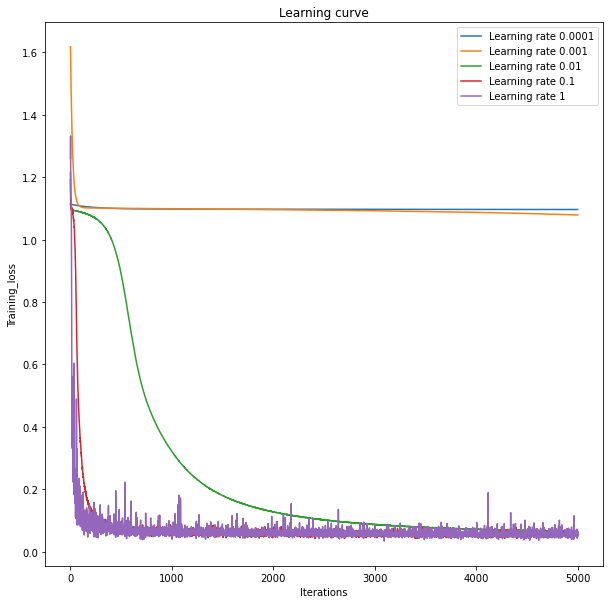

In [25]:
#Plotting the loss of training data and validation data
plt.figure(figsize=(10, 10))
plt.title("Learning curve")
plt.plot(results_LR1.history["loss"], label="Learning rate 0.0001")
plt.plot(results_LR2.history["loss"], label="Learning rate 0.001")
plt.plot(results_LR3.history["loss"], label="Learning rate 0.01")
plt.plot(results_LR4.history["loss"], label="Learning rate 0.1")
plt.plot(results_LR5.history["loss"], label="Learning rate 1")

plt.xlabel("Iterations")
plt.ylabel("Training_loss")
plt.legend();

### Generating training scores for each learning rate

In [26]:
Training_score=[0]
results1 = model_LR1.evaluate(X_test, y_test, batch_size=128)
for i in results1:
    Training_score[0] = i

1/1 [==============================] - 0s 15ms/step - loss: 1.1071 - accuracy: 0.2000


In [27]:
results2 = model_LR2.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results2:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 16ms/step - loss: 1.0906 - accuracy: 0.2000


In [28]:
results3 = model_LR3.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results3:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 1.0000


In [29]:
results4 = model_LR4.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results4:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 15ms/step - loss: 0.0121 - accuracy: 1.0000


In [30]:
results5 = model_LR5.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results5:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 15ms/step - loss: 0.0226 - accuracy: 1.0000


This is results of prediction on 5 samples and the below is real labels

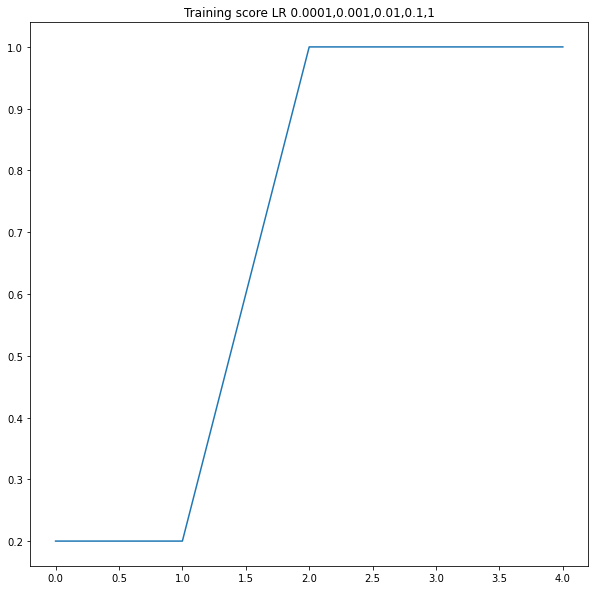

In [31]:
#Plotting the loss of training score
plt.figure(figsize=(10, 10))
plt.title("Training score LR 0.0001,0.001,0.01,0.1,1")
plt.plot(Training_score, label="Training score plot")

## 3. Report execution time for each learning rate as a bar graph. (Use library time and time() method)

In [32]:
from tabulate import tabulate
print(tabulate([['0.0001', Training_score[0],Elapsed_time[0]], ['0.001', Training_score[1],Elapsed_time[1]],['0.01', Training_score[2],Elapsed_time[2]],['0.1', Training_score[3],Elapsed_time[3]],['1', Training_score[4],Elapsed_time[4]]], headers=['Learning rate', 'Training score','Execution time']))

  Learning rate    Training score    Execution time
---------------  ----------------  ----------------
         0.0001               0.2           274.957
         0.001                0.2           286.355
         0.01                 1             281.257
         0.1                  1             273.977
         1                    1             246.542
